In [1]:
# imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pylab import rcParams
import statsmodels.api as sm
import ruptures as rpt
import math

In [2]:
# !pip install ruptures

## Actual data pre COVID:

In [3]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [4]:
actual_pre = pd.read_excel("Train/Actuals_part1.xlsx")

In [5]:
actual_pre = actual_pre.sort_values('Time')

In [6]:
actual_pre.head()

Time     Load (kW)  Pressure_kpa  Cloud Cover (%)  \
0 2017-03-18 00:00:00 1031471.62806    1012.48000          2.12500   
1 2017-03-18 01:00:00 1007205.57844    1011.61875          0.00000   
2 2017-03-18 02:00:00  986108.40072    1010.72000          2.12500   
3 2017-03-18 03:00:00  970760.96692    1011.37625         17.12500   
4 2017-03-18 04:00:00  962258.36502    1011.50000         18.62500   

   Humidity (%)  Temperature (C)   Wind Direction (deg)  Wind Speed (kmh)  
0      79.33333          16.76439             285.25000           6.25375  
1      82.16667          15.72939             285.00000           9.20500  
2      81.66667          15.81689             316.00000          11.28375  
3      82.25000          15.91939             327.00000           7.16875  
4      82.33333          15.76939             282.25000           0.78000

In [7]:
actual_pre.tail()

Time     Load (kW)  Pressure_kpa  Cloud Cover (%)  \
31891 2020-11-05 19:00:00 1141299.02814    1010.35000         53.37500   
31892 2020-11-05 20:00:00 1112589.66414    1011.10000         36.87500   
31893 2020-11-05 21:00:00 1086038.13814    1011.56250         33.87500   
31894 2020-11-05 22:00:00 1062102.90214    1011.45000         58.62500   
31895 2020-11-05 23:00:00 1022583.90014    1011.38750         53.62500   

       Humidity (%)  Temperature (C)   Wind Direction (deg)  Wind Speed (kmh)  
31891      69.33333          18.31939             342.00000          10.18625  
31892      69.33333          17.81939             221.50000           8.77000  
31893      69.33333          17.64189               5.12500           9.94125  
31894      70.50000          16.49939             180.75000          10.16250  
31895      71.83333          15.09689              15.87500          10.09375

### renaming the columns:

In [8]:
actual_pre.rename(columns={"Time": "time", 
                   "Load (kW)": "load_kw", 
                   "Cloud Cover (%)" : "cloud_cover",
                   "Humidity (%)": "humidity", 
                  "Temperature (C) ": "temperature_c", 
                  "Wind Direction (deg)": "wind_direction", 
                  "Wind Speed (kmh)": "wind_speed_kmh", 
                    "Pressure_kpa": "pressure_kpa"}, inplace=True)

In [9]:
actual_pre.shape

(31896, 8)

## Actual data post COVID:

In [10]:
actual_post = pd.read_csv("Train/Actuals_part2.csv", parse_dates=True)

In [11]:
actual_post.head()

Time     Load (kW)  Pressure_kpa  Cloud Cover (%)  Humidity (%)  \
0  6/11/2020 0:00 1022463.93200    1011.00000         36.50000      71.58333   
1  6/11/2020 1:00 1007171.43200    1010.50000         30.62500      73.33333   
2  6/11/2020 2:00  994545.93200    1010.00000         43.37500      72.83333   
3  6/11/2020 3:00  985150.43200    1009.73750         51.50000      72.66667   
4  6/11/2020 4:00  983825.43200    1009.78750         54.25000      73.08333   

   Temperature (C)   Wind Direction (deg)  Wind Speed (kmh)  
0          14.84939             313.12500          10.43125  
1          13.41439              57.87500           9.56375  
2          12.93189              17.62500           4.87750  
3          12.67689              24.87500           4.46750  
4          12.31939              31.50000           4.51625

In [12]:
actual_post.tail()

Time     Load (kW)  Pressure_kpa  Cloud Cover (%)  \
1699  15/1/2021 19:00 1141078.93200    1013.38750         38.37500   
1700  15/1/2021 20:00 1108896.43200    1013.97500         28.12500   
1701  15/1/2021 21:00 1078978.43200    1014.18750         21.12500   
1702  15/1/2021 22:00 1044494.93200    1014.12500         17.37500   
1703  15/1/2021 23:00 1010233.93200    1013.90000         13.25000   

      Humidity (%)  Temperature (C)   Wind Direction (deg)  Wind Speed (kmh)  
1699      68.33333          11.73439             306.87500           6.63375  
1700      73.91667           9.05689             297.62500          10.08750  
1701      75.83333           8.41439             334.00000           8.18000  
1702      74.25000           8.04189              73.62500           4.12250  
1703      77.25000           6.54189              37.62500           2.87000

### Changing the time to datetime type:

In [13]:
actual_post['Time'] = pd.to_datetime(actual_post['Time'], dayfirst = True)

In [14]:
actual_post = actual_post.sort_values('Time')

### Renaming columns:

In [15]:
actual_post.rename(columns={"Time": "time", 
                   "Load (kW)": "load_kw", 
                   "Cloud Cover (%)" : "cloud_cover",
                   "Humidity (%)": "humidity", 
                  "Temperature (C) ": "temperature_c", 
                  "Wind Direction (deg)": "wind_direction", 
                  "Wind Speed (kmh)": "wind_speed_kmh", 
                    "Pressure_kpa": "pressure_kpa"}, inplace=True)

In [16]:
actual_post.shape

(1704, 8)

## Forecast data pre COVID:

In [17]:
forecast_pre = pd.read_csv("Train/forecasts_part1.csv", parse_dates=True)

In [18]:
forecast_pre.head()

cloud_cover            time  pressure_kpa  Temperature (C)  \
0            3  18/3/2017 0:00          1011               14   
1            4  18/3/2017 1:00          1011               14   
2            4  18/3/2017 2:00          1011               14   
3            4  18/3/2017 3:00          1011               14   
4            4  18/3/2017 4:00          1011               14   

   wind_direction_deg  wind_speed_kmh  
0                 307               2  
1                 215               2  
2                 123               1  
3                  31               1  
4                 138               1

In [19]:
forecast_pre.tail()

cloud_cover              time  pressure_kpa  Temperature (C)  \
32155           30  16/11/2020 19:00          1014               18   
32156           30  16/11/2020 20:00          1014               18   
32157           31  16/11/2020 21:00          1015               18   
32158           33  16/11/2020 22:00          1015               18   
32159           36  16/11/2020 23:00          1015               18   

       wind_direction_deg  wind_speed_kmh  
32155                 301              13  
32156                 271              12  
32157                 242              11  
32158                 169              10  
32159                  95               9

In [20]:
forecast_pre.rename(columns={"Temperature (C)": "temperature_c", "wind_direction_deg":"wind_direction"}, inplace=True)

In [21]:
forecast_pre['time'] = pd.to_datetime(forecast_pre['time'], dayfirst = True)

In [22]:
forecast_pre = forecast_pre.sort_values('time')

In [23]:
forecast_pre.shape

(32160, 6)

## Forecast post COVID:

In [24]:
forecast_post = pd.read_csv("Train/Forecasts_part2.csv", parse_dates=True)

In [25]:
forecast_post.head()

Temperature (C)   Pressure_kpa  Cloud Cover (%)  Wind Direction (deg)  \
0          15.72189          1011               20                    13   
1          15.72189          1011               22                    14   
2          15.72189          1011               24                    15   
3          15.72189          1010               25                    16   
4          15.72189          1010               26                    17   

   Wind Speed (kmh)            Time  
0                12  6/11/2020 0:00  
1                12  6/11/2020 1:00  
2                12  6/11/2020 2:00  
3                11  6/11/2020 3:00  
4                11  6/11/2020 4:00

In [26]:
forecast_post.tail()

Temperature (C)   Pressure_kpa  Cloud Cover (%)  Wind Direction (deg)  \
1699          15.72189          1013                0                   290   
1700          13.72189          1013                0                   262   
1701          11.72189          1014                0                   233   
1702           9.72189          1014                1                   160   
1703           7.72189          1014                2                    87   

      Wind Speed (kmh)             Time  
1699                14  15/1/2021 19:00  
1700                13  15/1/2021 20:00  
1701                12  15/1/2021 21:00  
1702                11  15/1/2021 22:00  
1703                11  15/1/2021 23:00

In [27]:
forecast_post.rename(columns={"Time": "time",  
                   "Cloud Cover (%)" : "cloud_cover",
                   "Humidity (%)": "humidity", 
                  "Temperature (C) ": "temperature_c", 
                  "Wind Direction (deg)": "wind_direction", 
                  "Wind Speed (kmh)": "wind_speed_kmh", 
                    "Pressure_kpa": "pressure_kpa"}, inplace=True)

In [28]:
forecast_post['time'] = pd.to_datetime(forecast_post['time'], dayfirst = True)

In [29]:
forecast_post = forecast_post.sort_values('time')

In [30]:
forecast_post.head()

temperature_c  pressure_kpa  cloud_cover  wind_direction  wind_speed_kmh  \
0       15.72189          1011           20              13              12   
1       15.72189          1011           22              14              12   
2       15.72189          1011           24              15              12   
3       15.72189          1010           25              16              11   
4       15.72189          1010           26              17              11   

                 time  
0 2020-11-06 00:00:00  
1 2020-11-06 01:00:00  
2 2020-11-06 02:00:00  
3 2020-11-06 03:00:00  
4 2020-11-06 04:00:00

In [31]:
forecast_pre.shape

(32160, 6)

In [32]:
forecast_post.shape

(1704, 6)

In [33]:
actual_pre.shape

(31896, 8)

In [34]:
actual_post.shape

(1704, 8)

Splitting datasets into pre and post by March 2020

### ACTUALS
Actuals part 1 and part 2 have no overlapping

In [35]:
actual_pre_temp = actual_pre.loc[(actual_pre["time"]<'2020-03-01')]

In [36]:
actual_post_temp = actual_pre.loc[(actual_pre["time"]>='2020-03-01')]
ac_post_temp = pd.concat([actual_post_temp, actual_post])

In [37]:
print("actual_pre_temp shape", actual_pre_temp.shape)
print("actual_post_temp shape", ac_post_temp.shape)

print("sum of the rows", len(actual_pre_temp) + len(ac_post_temp))
print("correct num of rows: ", len(actual_pre) + len(actual_post))

actual_pre_temp shape (25896, 8)
actual_post_temp shape (7704, 8)
sum of the rows 33600
correct num of rows:  33600


In [38]:
#overwrite actual_pre and actual_post 

actual_pre = actual_pre_temp
actual_post = ac_post_temp

### FORECAST

Forecast part 1 and part 2 overlap at 6/11/2020 - 16/11/2020

In [39]:
forecast_pre_temp = forecast_pre.loc[(forecast_pre["time"]<'2020-03-01')]

# shape matches up 
forecast_pre_temp.shape

(25896, 6)

In [40]:
fc_post_temp = forecast_pre.loc[(forecast_pre["time"]>='2020-03-01') & (forecast_pre["time"] < '2020-11-06')]  #from 01/03 to 06/11

In [41]:
fc_post_temp.tail()  ##only up to 05/11

cloud_cover                time  pressure_kpa  temperature_c  \
31891           27 2020-11-05 19:00:00          1010             18   
31892           26 2020-11-05 20:00:00          1011             18   
31893           25 2020-11-05 21:00:00          1011             18   
31894           23 2020-11-05 22:00:00          1011             16   
31895           22 2020-11-05 23:00:00          1011             16   

       wind_direction  wind_speed_kmh  
31891             309              20  
31892             275              18  
31893             240              16  
31894             164              15  
31895              87              14

In [42]:
fc_post_overlap1 = forecast_pre.loc[(forecast_pre["time"]>='2020-11-06')]       #from pre
fc_post_overlap2 = forecast_post.loc[(forecast_post["time"]) < '2020-11-17']       #from post

In [43]:
post_overlap = pd.concat([fc_post_overlap1, fc_post_overlap2], ignore_index = True)

In [44]:
post_overlap.shape  #11 days overlap so 11*24*2

(528, 6)

In [45]:
#average where their timestamps match up
post_overlap['cloud_cover'] = post_overlap.groupby('time')['cloud_cover'].transform('mean')
post_overlap['pressure_kpa'] = post_overlap.groupby('time')['pressure_kpa'].transform('mean')
post_overlap['temperature_c'] = post_overlap.groupby('time')['temperature_c'].transform('mean')
post_overlap['wind_direction'] = post_overlap.groupby('time')['wind_direction'].transform('mean')
post_overlap['wind_speed_kmh'] = post_overlap.groupby('time')['wind_speed_kmh'].transform('mean')

In [46]:
#checking that it's correct 
post_overlap[post_overlap['time'] == '2020-11-06 1:00:00']

cloud_cover                time  pressure_kpa  temperature_c  \
1       22.00000 2020-11-06 01:00:00    1011.00000       15.86094   
265     22.00000 2020-11-06 01:00:00    1011.00000       15.86094   

     wind_direction  wind_speed_kmh  
1          13.00000        12.00000  
265        13.00000        12.00000

In [47]:
post_overlap = post_overlap.drop_duplicates()

In [48]:
forecast_post_temp = forecast_post.loc[(forecast_post["time"]>='2020-11-17')]

fc_post_temp1 = pd.concat([fc_post_temp, post_overlap]) # fc_post_temp + post_overlap (03/11 -> 05/11) + (06/11 -> 16/11)
fc_post_temp2 = pd.concat([fc_post_temp1, forecast_post_temp])  #(+ 17/11 onwards)

In [49]:
#check if number of rows match up to actuals post
fc_post_temp2.shape

(7704, 6)

In [50]:
print("forecast_pre shape", forecast_pre_temp.shape)
print("forecast_post shape", fc_post_temp2.shape)

print("sum of the rows", len(forecast_pre_temp) + len(fc_post_temp2))
print("correct num of rows: ", len(forecast_pre) + len(forecast_post) - (11*24))

forecast_pre shape (25896, 6)
forecast_post shape (7704, 6)
sum of the rows 33600
correct num of rows:  33600


In [51]:
forecast_pre = forecast_pre_temp
forecast_post = fc_post_temp2

## Data wrangling:

### Null values:

In [52]:
actual_pre.isnull().sum() # all good

time              0
load_kw           0
pressure_kpa      0
cloud_cover       0
humidity          0
temperature_c     0
wind_direction    0
wind_speed_kmh    0
dtype: int64

In [53]:
actual_post.isnull().sum() # all good

time              0
load_kw           0
pressure_kpa      0
cloud_cover       0
humidity          0
temperature_c     0
wind_direction    0
wind_speed_kmh    0
dtype: int64

In [54]:
forecast_pre.isnull().sum() # all good

cloud_cover       0
time              0
pressure_kpa      0
temperature_c     0
wind_direction    0
wind_speed_kmh    0
dtype: int64

In [55]:
forecast_post.isnull().sum()

cloud_cover       0
time              0
pressure_kpa      0
temperature_c     0
wind_direction    0
wind_speed_kmh    0
dtype: int64

### Checking dimensions match up:

In [56]:
actual_pre.shape

(25896, 8)

In [57]:
forecast_pre.shape

(25896, 6)

^^^ they are NOT matching  

In [58]:
actual_post.shape

(7704, 8)

In [59]:
forecast_post.shape

(7704, 6)

^^^ We are good with these hopefully

### Looking for duplicates:

In [60]:
actual_pre.duplicated().sum()

0

In [61]:
forecast_pre.duplicated().sum()

0

In [62]:
actual_post.duplicated().sum()

0

In [63]:
forecast_post.duplicated().sum()

0

In [64]:
actual_pre.time.duplicated().sum()

0

In [65]:
forecast_pre.time.duplicated().sum()

0

In [66]:
forecast_pre.duplicated(subset=['time']).sum()

0

In [67]:
actual_pre.duplicated(subset=['time']).sum()

0

## Using data from 06/11 to 16/11 from post covid forecasts:



In [68]:
forecast_pre = forecast_pre[(forecast_pre['time'] <= datetime(2020, 11, 5 , 23, 0, 0))]

In [69]:
forecast_pre

cloud_cover                time  pressure_kpa  temperature_c  \
0                3 2017-03-18 00:00:00          1011             14   
1                4 2017-03-18 01:00:00          1011             14   
2                4 2017-03-18 02:00:00          1011             14   
3                4 2017-03-18 03:00:00          1011             14   
4                4 2017-03-18 04:00:00          1011             14   
...            ...                 ...           ...            ...   
25891            0 2020-02-29 19:00:00          1010             14   
25892            0 2020-02-29 20:00:00          1011             12   
25893            0 2020-02-29 21:00:00          1011             10   
25894            0 2020-02-29 22:00:00          1011             10   
25895            0 2020-02-29 23:00:00          1011             10   

       wind_direction  wind_speed_kmh  
0                 307               2  
1                 215               2  
2                 123               1  
3                  31               1  
4                 138               1  
...               ...             ...  
25891             306              24  
25892             273              20  
25893             241              17  
25894             173              14  
25895             104              11  

[25896 rows x 6 columns]

## Checking for missing dates:

There are 1328 days from 18/03/2017 to 05/11/2020. So there should be 1328 * 24 = 31872

In [70]:
# actuals pre COVID
pd.date_range(start="2017-03-18 00:00:00", end="2020-11-05 23:00:00", freq='H').difference(actual_pre.time)

DatetimeIndex(['2020-03-01 00:00:00', '2020-03-01 01:00:00',
               '2020-03-01 02:00:00', '2020-03-01 03:00:00',
               '2020-03-01 04:00:00', '2020-03-01 05:00:00',
               '2020-03-01 06:00:00', '2020-03-01 07:00:00',
               '2020-03-01 08:00:00', '2020-03-01 09:00:00',
               ...
               '2020-11-05 14:00:00', '2020-11-05 15:00:00',
               '2020-11-05 16:00:00', '2020-11-05 17:00:00',
               '2020-11-05 18:00:00', '2020-11-05 19:00:00',
               '2020-11-05 20:00:00', '2020-11-05 21:00:00',
               '2020-11-05 22:00:00', '2020-11-05 23:00:00'],
              dtype='datetime64[ns]', length=6000, freq=None)

In [71]:
# forecasts pre COVID
pd.date_range(start="2017-03-18 00:00:00", end="2020-11-05 23:00:00", freq='H').difference(forecast_pre.time)

DatetimeIndex(['2020-03-01 00:00:00', '2020-03-01 01:00:00',
               '2020-03-01 02:00:00', '2020-03-01 03:00:00',
               '2020-03-01 04:00:00', '2020-03-01 05:00:00',
               '2020-03-01 06:00:00', '2020-03-01 07:00:00',
               '2020-03-01 08:00:00', '2020-03-01 09:00:00',
               ...
               '2020-11-05 14:00:00', '2020-11-05 15:00:00',
               '2020-11-05 16:00:00', '2020-11-05 17:00:00',
               '2020-11-05 18:00:00', '2020-11-05 19:00:00',
               '2020-11-05 20:00:00', '2020-11-05 21:00:00',
               '2020-11-05 22:00:00', '2020-11-05 23:00:00'],
              dtype='datetime64[ns]', length=6000, freq=None)

## Data transformation:

### Separate the dates:

In [72]:
actual_pre['date'] = actual_pre.time.apply(lambda x: x.date())

actual_pre['datetime'] = actual_pre.time.apply(lambda x: x.time())

forecast_pre['date'] = forecast_pre.time.apply(lambda x: x.date())

forecast_pre['datetime'] = forecast_pre.time.apply(lambda x: x.time())

In [73]:
actual_post['date'] = actual_post.time.apply(lambda x: x.date())

actual_post['datetime'] = actual_post.time.apply(lambda x: x.time())

forecast_post['date'] = forecast_post.time.apply(lambda x: x.date())

forecast_post['datetime'] = forecast_post.time.apply(lambda x: x.time()) #gives an error because there is a null row

### Separate the months:

In [74]:
actual_pre['month'] = actual_pre.time.apply(lambda x: x.month)

forecast_pre['month'] = forecast_pre.time.apply(lambda x: x.month)

In [75]:
actual_post['month'] = actual_post.time.apply(lambda x: x.month)

forecast_post['month'] = forecast_post.time.apply(lambda x: x.month)

### Separate the hours:

In [76]:
actual_pre['hour'] = actual_pre.time.apply(lambda x: x.hour)

forecast_pre['hour'] = forecast_pre.time.apply(lambda x: x.hour)

In [77]:
actual_post['hour'] = actual_post.time.apply(lambda x: x.hour)

forecast_post['hour'] = forecast_post.time.apply(lambda x: x.hour)

### Get the type of day:

In [78]:
actual_pre['type_of_day'] = actual_pre.time.apply(lambda x: x.weekday() + 1)

actual_post['type_of_day'] = actual_post.time.apply(lambda x: x.weekday() + 1)

forecast_pre['type_of_day'] = forecast_pre.time.apply(lambda x: x.weekday() + 1)

forecast_post['type_of_day'] = actual_post.time.apply(lambda x: x.weekday() +1)

## Final dataframes:

In [79]:
actual_pre.tail()

time       load_kw  pressure_kpa  cloud_cover  humidity  \
25891 2020-02-29 19:00:00 1137285.04814    1009.90000      7.50000  64.33333   
25892 2020-02-29 20:00:00 1115285.04814    1010.50000     12.00000  68.33333   
25893 2020-02-29 21:00:00 1092285.04814    1010.90000      4.50000  69.91667   
25894 2020-02-29 22:00:00 1061785.04814    1011.35000      0.00000  68.75000   
25895 2020-02-29 23:00:00 1035285.04814    1011.60000     17.25000  68.58333   

       temperature_c  wind_direction  wind_speed_kmh        date  datetime  \
25891       15.71189       335.25000        15.21625  2020-02-29  19:00:00   
25892       13.37189       344.75000        13.60625  2020-02-29  20:00:00   
25893       12.04439       224.37500        10.96375  2020-02-29  21:00:00   
25894       11.41189        19.75000         7.64625  2020-02-29  22:00:00   
25895       10.00939        64.75000         2.37000  2020-02-29  23:00:00   

       month  hour  type_of_day  
25891      2    19            6  
25892      2    20            6  
25893      2    21            6  
25894      2    22            6  
25895      2    23            6

In [80]:
actual_post.head()

time       load_kw  pressure_kpa  cloud_cover  humidity  \
25896 2020-03-01 00:00:00 1015285.04814    1011.36250     30.12500  69.66667   
25897 2020-03-01 01:00:00 1000785.04814    1010.81250     38.62500  68.66667   
25898 2020-03-01 02:00:00  988785.04814    1010.25000     42.37500  69.08333   
25899 2020-03-01 03:00:00  980285.04814    1010.08750     45.25000  69.33333   
25900 2020-03-01 04:00:00  975785.04814    1009.87500     46.75000  68.75000   

       temperature_c  wind_direction  wind_speed_kmh        date  datetime  \
25896        7.86939       210.87500         6.31375  2020-03-01  00:00:00   
25897        6.78689        77.25000         6.74750  2020-03-01  01:00:00   
25898        6.17439        48.37500         4.29375  2020-03-01  02:00:00   
25899        5.77689        64.12500         3.03250  2020-03-01  03:00:00   
25900        4.81189        60.12500         3.16125  2020-03-01  04:00:00   

       month  hour  type_of_day  
25896      3     0            7  
25897      3     1            7  
25898      3     2            7  
25899      3     3            7  
25900      3     4            7

In [81]:
forecast_pre.head()

cloud_cover                time  pressure_kpa  temperature_c  \
0            3 2017-03-18 00:00:00          1011             14   
1            4 2017-03-18 01:00:00          1011             14   
2            4 2017-03-18 02:00:00          1011             14   
3            4 2017-03-18 03:00:00          1011             14   
4            4 2017-03-18 04:00:00          1011             14   

   wind_direction  wind_speed_kmh        date  datetime  month  hour  \
0             307               2  2017-03-18  00:00:00      3     0   
1             215               2  2017-03-18  01:00:00      3     1   
2             123               1  2017-03-18  02:00:00      3     2   
3              31               1  2017-03-18  03:00:00      3     3   
4             138               1  2017-03-18  04:00:00      3     4   

   type_of_day  
0            6  
1            6  
2            6  
3            6  
4            6

In [82]:
forecast_post.head()

cloud_cover                time  pressure_kpa  temperature_c  \
25896      0.00000 2020-03-01 00:00:00    1011.00000       10.00000   
25897      1.00000 2020-03-01 01:00:00    1011.00000       12.00000   
25898      2.00000 2020-03-01 02:00:00    1010.00000       12.00000   
25899      2.00000 2020-03-01 03:00:00    1010.00000       14.00000   
25900      5.00000 2020-03-01 04:00:00    1010.00000       14.00000   

       wind_direction  wind_speed_kmh        date  datetime  month  hour  \
25896        36.00000         8.00000  2020-03-01  00:00:00      3     0   
25897        40.00000         8.00000  2020-03-01  01:00:00      3     1   
25898        43.00000         8.00000  2020-03-01  02:00:00      3     2   
25899        47.00000         8.00000  2020-03-01  03:00:00      3     3   
25900        45.00000         8.00000  2020-03-01  04:00:00      3     4   

       type_of_day  
25896            7  
25897            7  
25898            7  
25899            7  
25900            7

Writing dataframes into new CSV files

In [83]:
#writing them into files 
actual_pre.to_csv('Train/Actual_Pre.csv')
actual_post.to_csv('Train/Actual_Post.csv')

forecast_pre.to_csv('Train/Forecast_Pre.csv')
forecast_post.to_csv('Train/Forecast_Post.csv')

## Data exploration: 

### Overall:

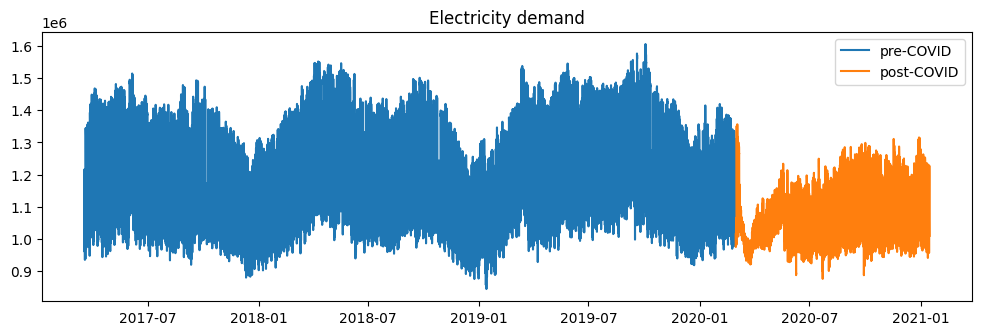

In [84]:
fig, ax = plt.subplots(figsize=(12, 3.5))

ax.plot(actual_pre.time, actual_pre.load_kw, label='pre-COVID')
ax.plot(actual_post.time, actual_post.load_kw, label='post-COVID')

ax.set_title('Electricity demand')
ax.legend();

Data seems to plummet around March 2020. This is something to consider when splitting the data.

### Statistical summaries/differences:

In [85]:
pre_covid_stats = actual_pre.describe()

In [86]:
pre_covid_stats

load_kw  pressure_kpa  cloud_cover    humidity  temperature_c  \
count   25896.00000   25896.00000  25896.00000 25896.00000    25896.00000   
mean  1174337.52840    1009.69129     38.16330    79.09968       16.85597   
std    154047.74775       3.98453     31.92983    11.24854        5.84964   
min    845471.35814     950.59500      0.00000    33.33333       -6.41811   
25%   1047820.16539    1006.62500      3.71875    71.41667       13.59939   
50%   1141464.15964    1010.18000     40.87500    80.91667       16.98439   
75%   1296394.62804    1012.66500     73.00000    87.91667       20.67439   
max   1605192.04314    1022.91500    100.00000   100.00000       39.06689   

       wind_direction  wind_speed_kmh       month        hour  type_of_day  
count     25896.00000     25896.00000 25896.00000 25896.00000  25896.00000  
mean        213.00852        13.03294     6.57739    11.50000      4.00185  
std          93.69184         6.71788     3.44745     6.92232      2.00004  
min           0.00000         0.00000     1.00000     0.00000      1.00000  
25%         130.09375         7.90844     4.00000     5.75000      2.00000  
50%         242.37500        12.38625     7.00000    11.50000      4.00000  
75%         287.00000        18.17000    10.00000    17.25000      6.00000  
max         356.37500        91.49750    12.00000    23.00000      7.00000

In [87]:
post_covid_stats = actual_post.describe()

In [88]:
post_covid_stats

load_kw  pressure_kpa  cloud_cover   humidity  temperature_c  \
count    7704.00000    7704.00000   7704.00000 7704.00000     7704.00000   
mean  1065940.57879    1008.24512     47.62007   82.46278       16.56028   
std     89504.53702       3.78199     32.93658   10.68677        5.33341   
min    876911.63114     994.00000      0.00000   47.75000       -4.19311   
25%    993613.55295    1005.50000     16.34375   75.50000       13.23689   
50%   1045911.52634    1008.63750     45.75000   84.16667       16.29564   
75%   1125258.94614    1011.21250     79.87500   91.16667       20.11251   
max   1356285.04814    1016.68750    100.00000  100.00000       34.69689   

       wind_direction  wind_speed_kmh      month       hour  type_of_day  
count      7704.00000      7704.00000 7704.00000 7704.00000   7704.00000  
mean        200.34005        11.80302    7.19626   11.50000      3.99377  
std          93.82584         6.31072    3.12414    6.92264      2.00012  
min           2.25000         0.12625    1.00000    0.00000      1.00000  
25%         120.84375         7.02125    5.00000    5.75000      2.00000  
50%         222.50000        10.94937    7.00000   11.50000      4.00000  
75%         277.75000        16.40125   10.00000   17.25000      6.00000  
max         357.50000        48.26000   12.00000   23.00000      7.00000

In [89]:
(pre_covid_stats - post_covid_stats) / pre_covid_stats

load_kw  pressure_kpa  cloud_cover  humidity  temperature_c  \
count  0.70250       0.70250      0.70250   0.70250        0.70250   
mean   0.09230       0.00143     -0.24780  -0.04252        0.01754   
std    0.41898       0.05083     -0.03153   0.04994        0.08825   
min   -0.03719      -0.04566          NaN  -0.43250        0.34668   
25%    0.05173       0.00112     -3.39496  -0.05718        0.02666   
50%    0.08371       0.00153     -0.11927  -0.04016        0.04055   
75%    0.13201       0.00143     -0.09418  -0.03697        0.02718   
max    0.15506       0.00609      0.00000   0.00000        0.11186   

       wind_direction  wind_speed_kmh    month     hour  type_of_day  
count         0.70250         0.70250  0.70250  0.70250      0.70250  
mean          0.05947         0.09437 -0.09409  0.00000      0.00202  
std          -0.00143         0.06061  0.09378 -0.00005     -0.00004  
min              -inf            -inf  0.00000      NaN      0.00000  
25%           0.07110         0.11218 -0.25000  0.00000      0.00000  
50%           0.08200         0.11601  0.00000  0.00000      0.00000  
75%           0.03223         0.09734  0.00000  0.00000      0.00000  
max          -0.00316         0.47255  0.00000  0.00000      0.00000

### Detecting seasonalities:

#### Before covid:

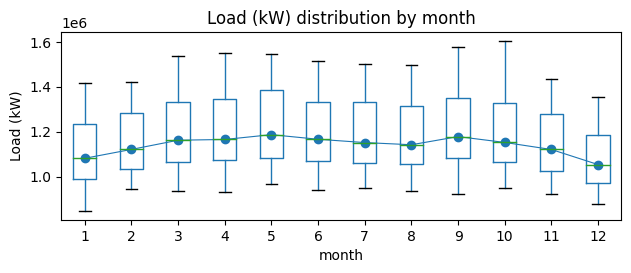

In [90]:
# Boxplot for annual seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 2.5))
actual_pre.boxplot(column='load_kw', by='month', ax=ax,)
actual_pre.groupby('month')['load_kw'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Load (kW)')
ax.set_title('Load (kW) distribution by month')
fig.suptitle('');

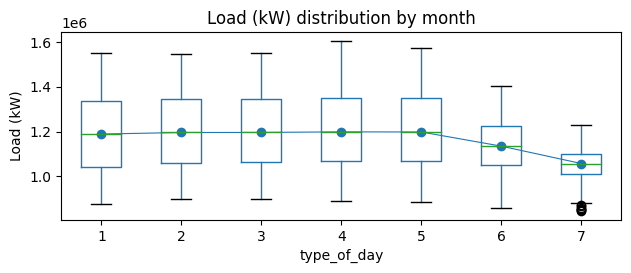

In [91]:
# Boxplot for weekly seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 2.5))
actual_pre.boxplot(column='load_kw', by='type_of_day', ax=ax,)
actual_pre.groupby('type_of_day')['load_kw'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Load (kW)')
ax.set_title('Load (kW) distribution by month')
fig.suptitle('');

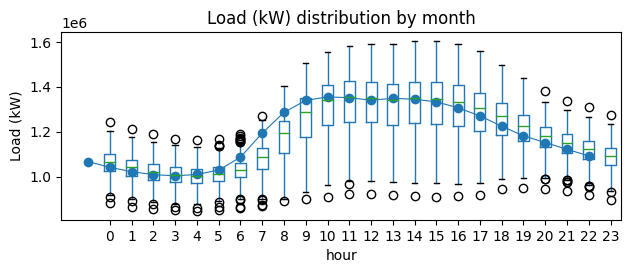

In [92]:
# Boxplot for daily seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 2.5))
actual_pre.boxplot(column='load_kw', by='hour', ax=ax,)
actual_pre.groupby('hour')['load_kw'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Load (kW)')
ax.set_title('Load (kW) distribution by month')
fig.suptitle('');

#### After covid:

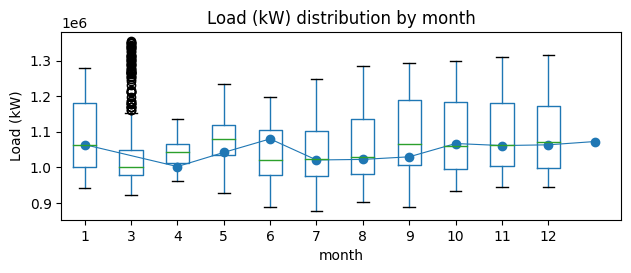

In [93]:
# Boxplot for annual seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 2.5))
actual_post.boxplot(column='load_kw', by='month', ax=ax,)
actual_post.groupby('month')['load_kw'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Load (kW)')
ax.set_title('Load (kW) distribution by month')
fig.suptitle('');

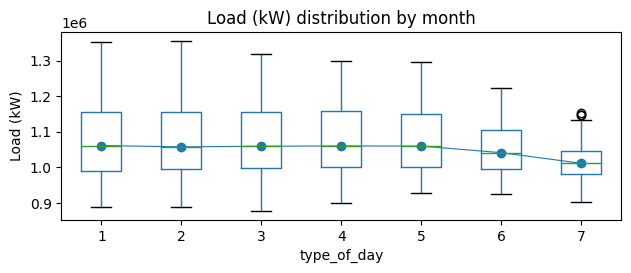

In [94]:
# Boxplot for weekly seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 2.5))
actual_post.boxplot(column='load_kw', by='type_of_day', ax=ax,)
actual_post.groupby('type_of_day')['load_kw'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Load (kW)')
ax.set_title('Load (kW) distribution by month')
fig.suptitle('');

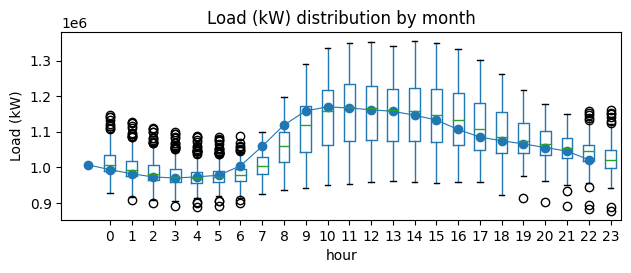

In [95]:
# Boxplot for daily seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 2.5))
actual_post.boxplot(column='load_kw', by='hour', ax=ax,)
actual_post.groupby('hour')['load_kw'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Load (kW)')
ax.set_title('Load (kW) distribution by month')
fig.suptitle('');

## Autocorrelation:

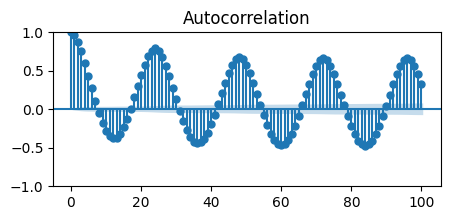

In [98]:
# Autocorrelation plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(5, 2))
plot_acf(actual_pre.load_kw, ax=ax, lags=100)
plt.show()

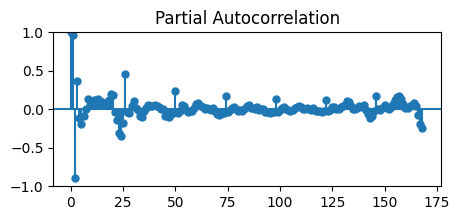

In [99]:
# Partial autocorrelation plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(5, 2))
plot_pacf(actual_pre.load_kw, ax=ax, lags=168)
plt.show()

The autocorrelation and partial autocorrelation plots show a clear relationship between demand in one hour and the previous hours, and between demand in one hour and the same hour in previous days. This type of correlation is an indication that autoregressive models can work well.

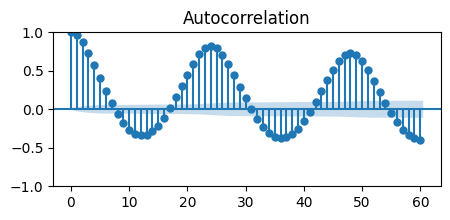

In [100]:
# Autocorrelation plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(5, 2))
plot_acf(actual_post.load_kw, ax=ax, lags=60)
plt.show()

## Weekdays vs weekends:

In [101]:
compiled = pd.read_csv('Train/Compiled.csv')

In [102]:
compiled.head()

Unnamed: 0  index          load   pressure  cloud_cov    humid     temp  \
0           0      0 1031471.62800 1012.48000    2.12500 79.33333 16.76439   
1           1      1 1007205.57800 1011.61875    0.00000 82.16667 15.72939   
2           2      2  986108.40070 1010.72000    2.12500 81.66667 15.81689   
3           3      3  970760.96690 1011.37625   17.12500 82.25000 15.91939   
4           4      4  962258.36500 1011.50000   18.62500 82.33333 15.76939   

   wind_dir  wind_sp  pressure_f  ...  h21  h22  h23  hour_sin hour_cos  \
0 285.25000  6.25375  1011.00000  ...    0    0    0   0.00000  1.00000   
1 285.00000  9.20500  1011.00000  ...    0    0    0   0.25882  0.96593   
2 316.00000 11.28375  1011.00000  ...    0    0    0   0.50000  0.86603   
3 327.00000  7.16875  1011.00000  ...    0    0    0   0.70711  0.70711   
4 282.25000  0.78000  1011.00000  ...    0    0    0   0.86603  0.50000   

   month_sin  month_cos  day_sin  day_cos        datetime  
0    1.00000    0.00000 -0.48530 -0.87435  18/3/2017 0:00  
1    1.00000    0.00000 -0.48530 -0.87435  18/3/2017 1:00  
2    1.00000    0.00000 -0.48530 -0.87435  18/3/2017 2:00  
3    1.00000    0.00000 -0.48530 -0.87435  18/3/2017 3:00  
4    1.00000    0.00000 -0.48530 -0.87435  18/3/2017 4:00  

[5 rows x 69 columns]

In [103]:
compiled['datetime'] = pd.to_datetime(compiled['datetime'])

In [104]:
new_data = compiled[['datetime', 'load']]

In [105]:
new_data.set_index('datetime')

load
datetime                         
2017-03-18 00:00:00 1031471.62800
2017-03-18 01:00:00 1007205.57800
2017-03-18 02:00:00  986108.40070
2017-03-18 03:00:00  970760.96690
2017-03-18 04:00:00  962258.36500
...                           ...
2021-01-15 19:00:00 1141078.93200
2021-01-15 20:00:00 1108896.43200
2021-01-15 21:00:00 1078978.43200
2021-01-15 22:00:00 1044494.93200
2021-01-15 23:00:00 1010233.93200

[33600 rows x 1 columns]

In [106]:
new_data.dtypes

datetime    datetime64[ns]
load               float64
dtype: object

In [107]:
# df_hourly = new_data['load'].resample('H').sum()

### Weekdays:

In [108]:
temp_data = compiled

In [109]:
temp_data['weekday'] = compiled.type_of_day.apply(lambda x: 1 if x < 6 else 0)

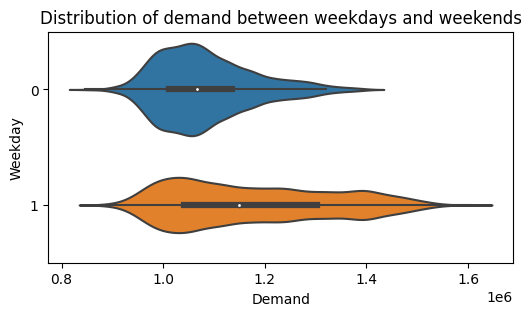

In [110]:
# Violinplot
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3))
sns.violinplot(
    x       = 'load',
    y       = 'weekday',
    data    = compiled.assign(weekday = compiled.weekday.astype(str)),
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribution of demand between weekdays and weekends')
ax.set_xlabel('Demand')
ax.set_ylabel('Weekday');

## Changing COVID dates:

In [111]:
compiled.columns

Index(['Unnamed: 0', 'index', 'load', 'pressure', 'cloud_cov', 'humid', 'temp',
       'wind_dir', 'wind_sp', 'pressure_f', 'cloud_cov_f', 'temp_f',
       'wind_dir_f', 'wind_sp_f', 'date', 'month', 'hour', 'type_of_day',
       'day', ' year', 'covid', 'pub_hol', 'tue', 'wed', 'thu', 'fri', 'sat',
       'sun', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct',
       'nov', 'dec', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8', 'h9',
       'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19',
       'h20', 'h21', 'h22', 'h23', 'hour_sin', 'hour_cos', 'month_sin',
       'month_cos', 'day_sin', 'day_cos', 'datetime', 'weekday'],
      dtype='object')

In [112]:
impressions = compiled['load'].values.reshape(-1, 1)

In [113]:
impressions

array([[1031471.628 ],
       [1007205.578 ],
       [ 986108.4007],
       ...,
       [1078978.432 ],
       [1044494.932 ],
       [1010233.932 ]])

Changepoint detection

In [114]:
algo = rpt.Binseg(model="l2", min_size=28)
algo.fit(impressions)
result = algo.predict(n_bkps=14)

(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

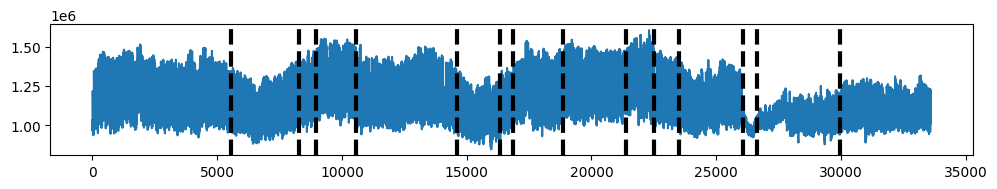

In [115]:
rpt.display(impressions, [], result)

In [116]:
print(result)

[5540, 8290, 8960, 10580, 14615, 16355, 16855, 18870, 21390, 22510, 23520, 26060, 26650, 29960, 33600]


## Decomposing data into trend, seasonality, noise:

In [117]:
y = actual_pre[['time', 'load_kw']]
y = y.set_index('time')
y = y.reset_index()

In [118]:
y17 = []
y18 = []
y19 = []
y20 = []

In [119]:

for i in range(len(y)):
    if y["time"][i].year == 2017:
        y17.append(y.iloc[i])
    if y["time"][i].year == 2018:
        y18.append(y.iloc[i])
    if y["time"][i].year == 2019:
        y19.append(y.iloc[i])
    if y["time"][i].year == 2020:
        y20.append(y.iloc[i])

In [120]:
y17 = pd.DataFrame(y17).set_index('time')
y18 = pd.DataFrame(y18).set_index('time')
y19 = pd.DataFrame(y19).set_index('time')
y20 = pd.DataFrame(y20).set_index('time')

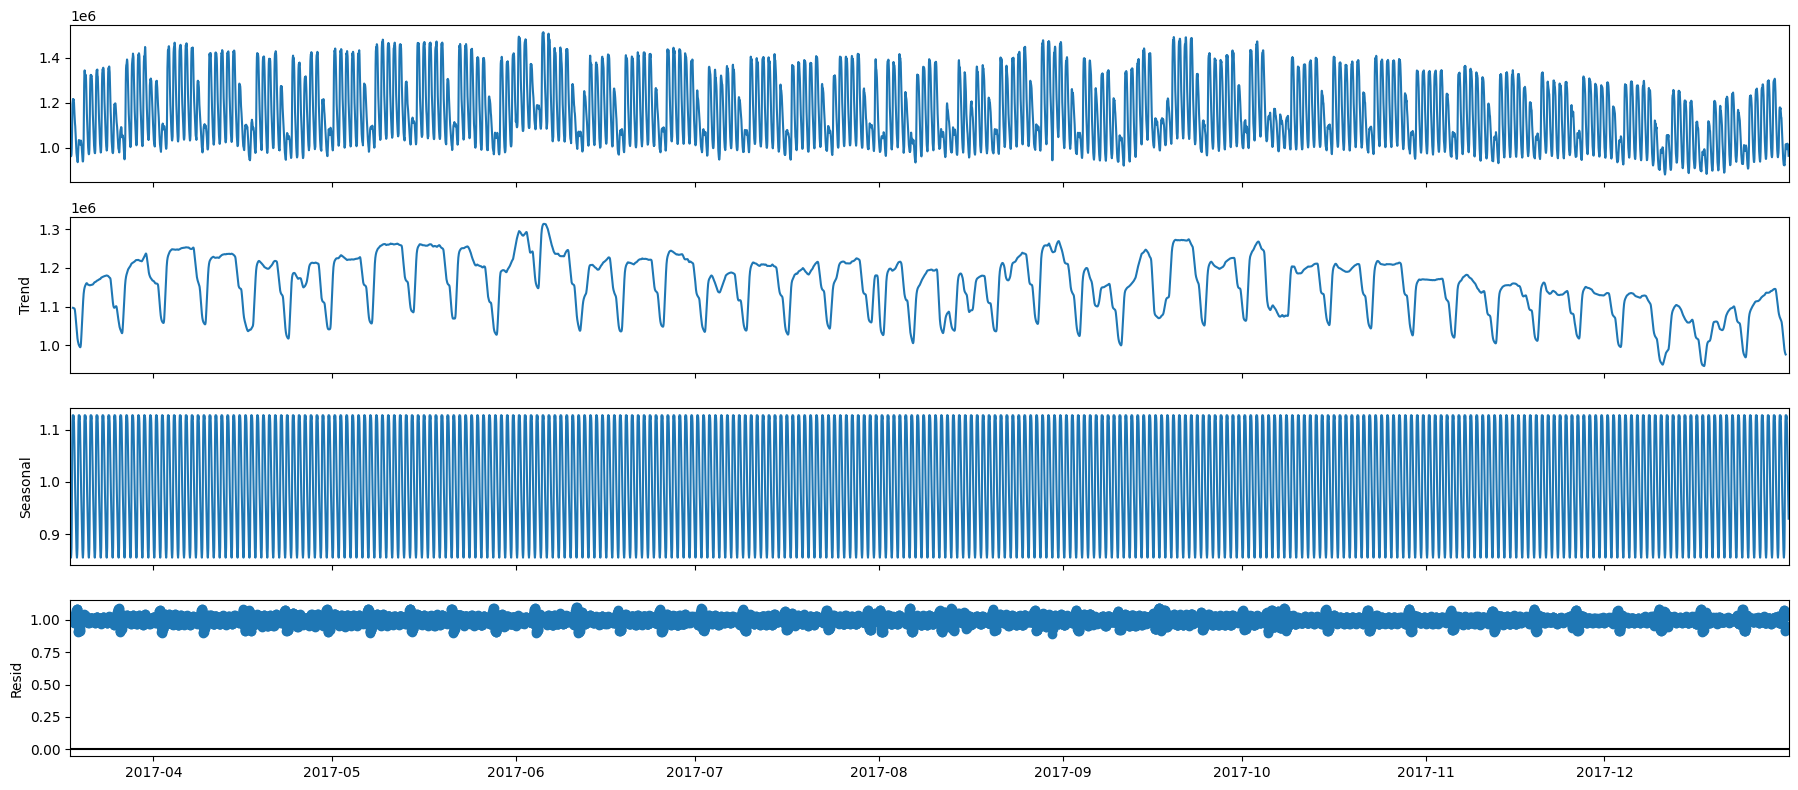

In [121]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y17, model='multiplicative')
fig = decomposition.plot()
plt.show()

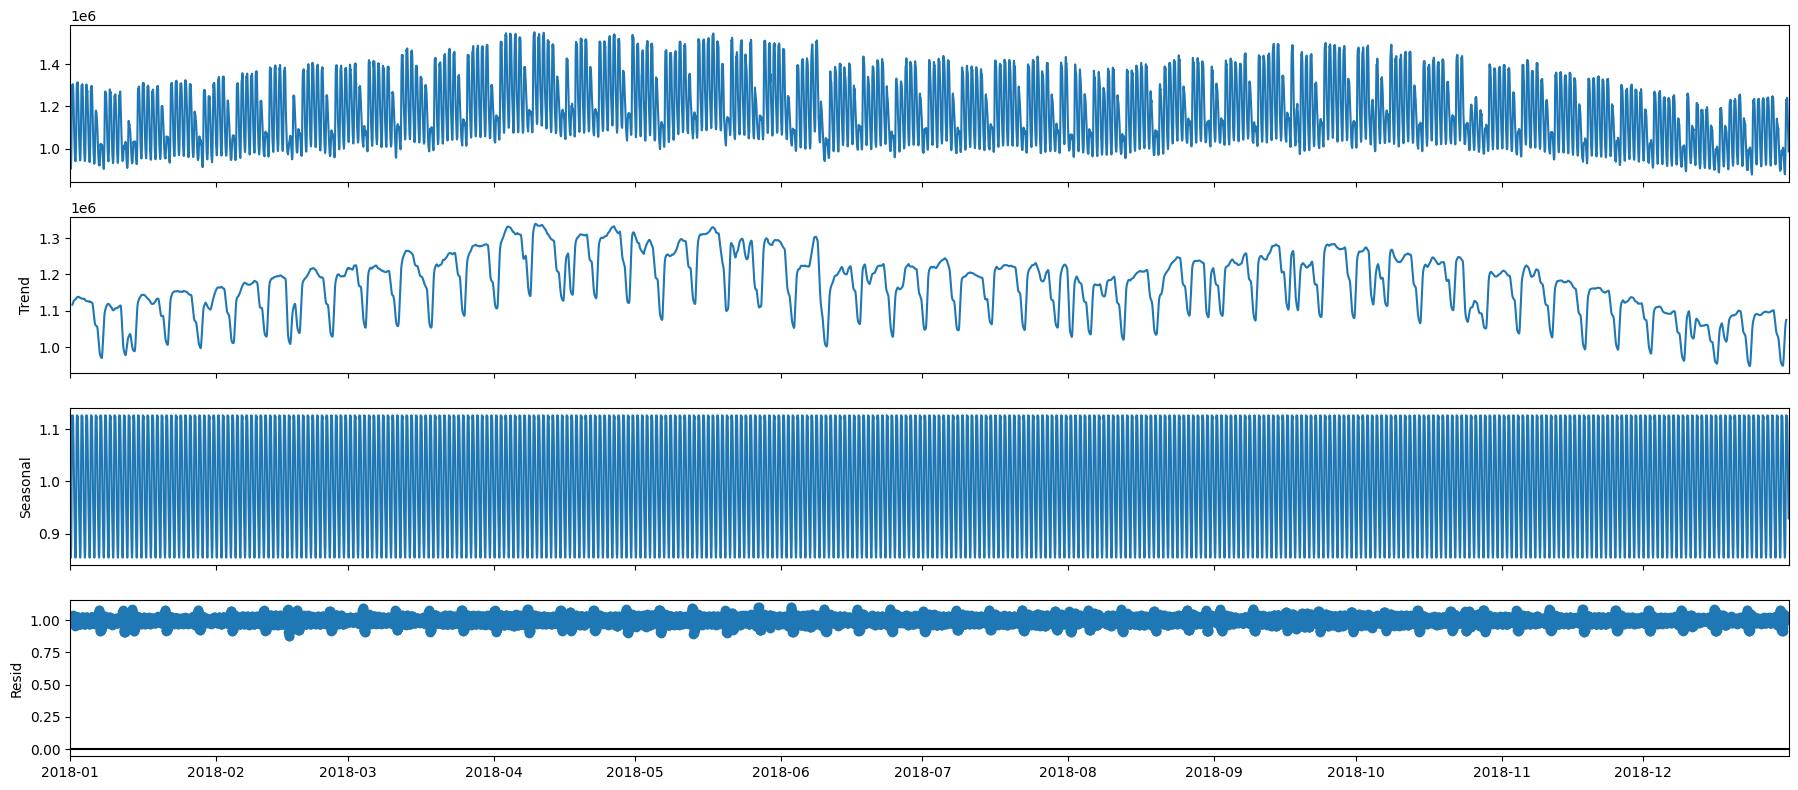

In [122]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y18, model='multiplicative')
fig = decomposition.plot()
plt.show()

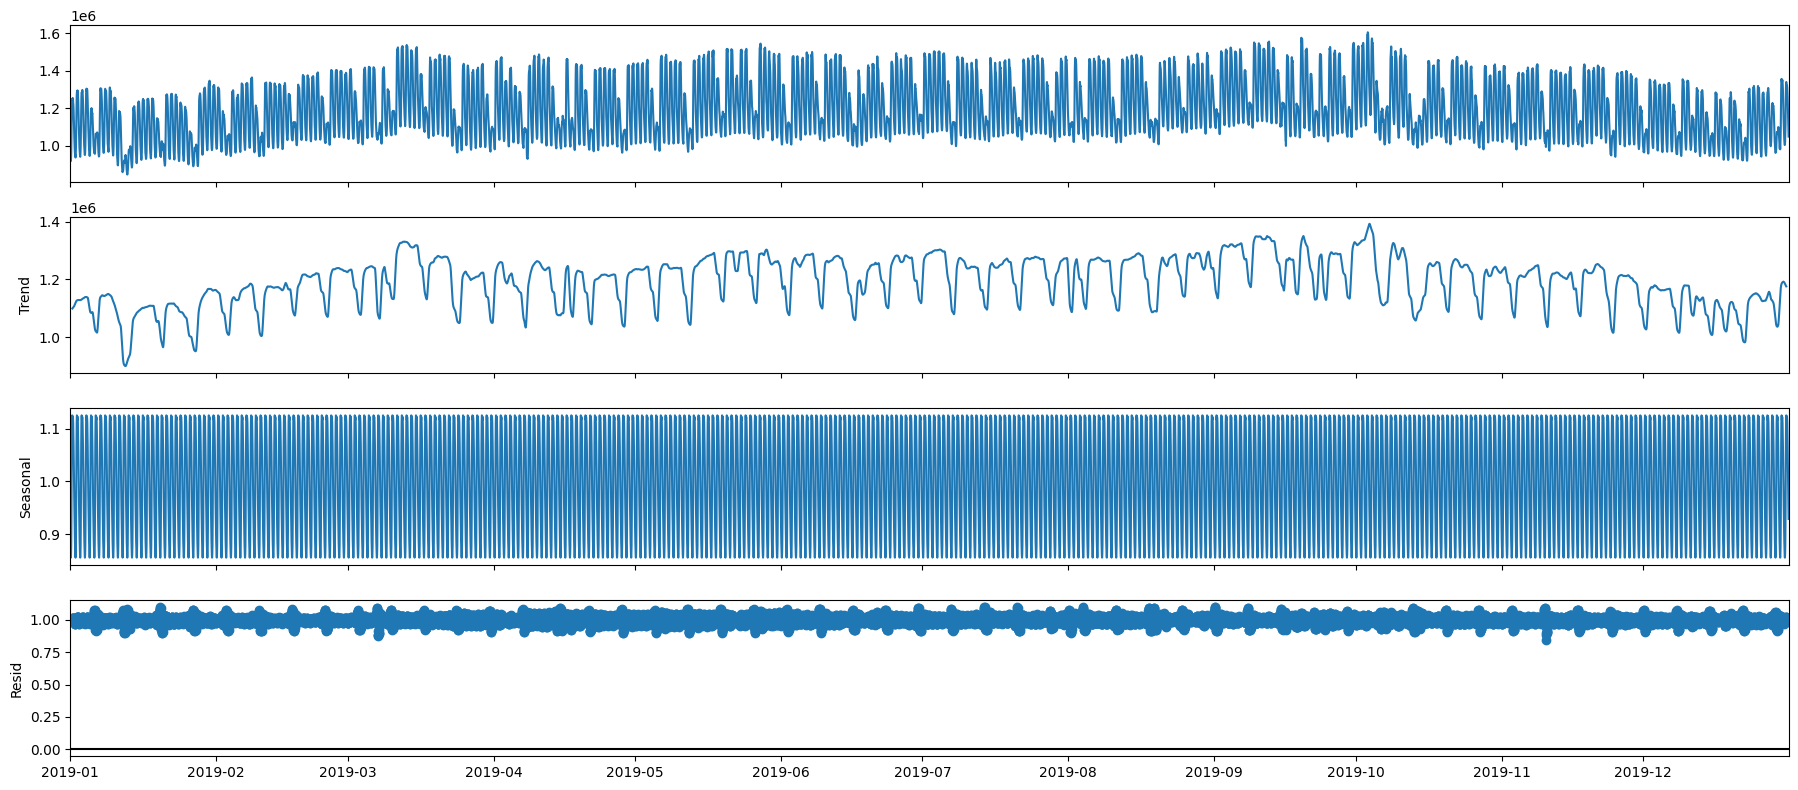

In [123]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y19, model='multiplicative')
fig = decomposition.plot()
plt.show()

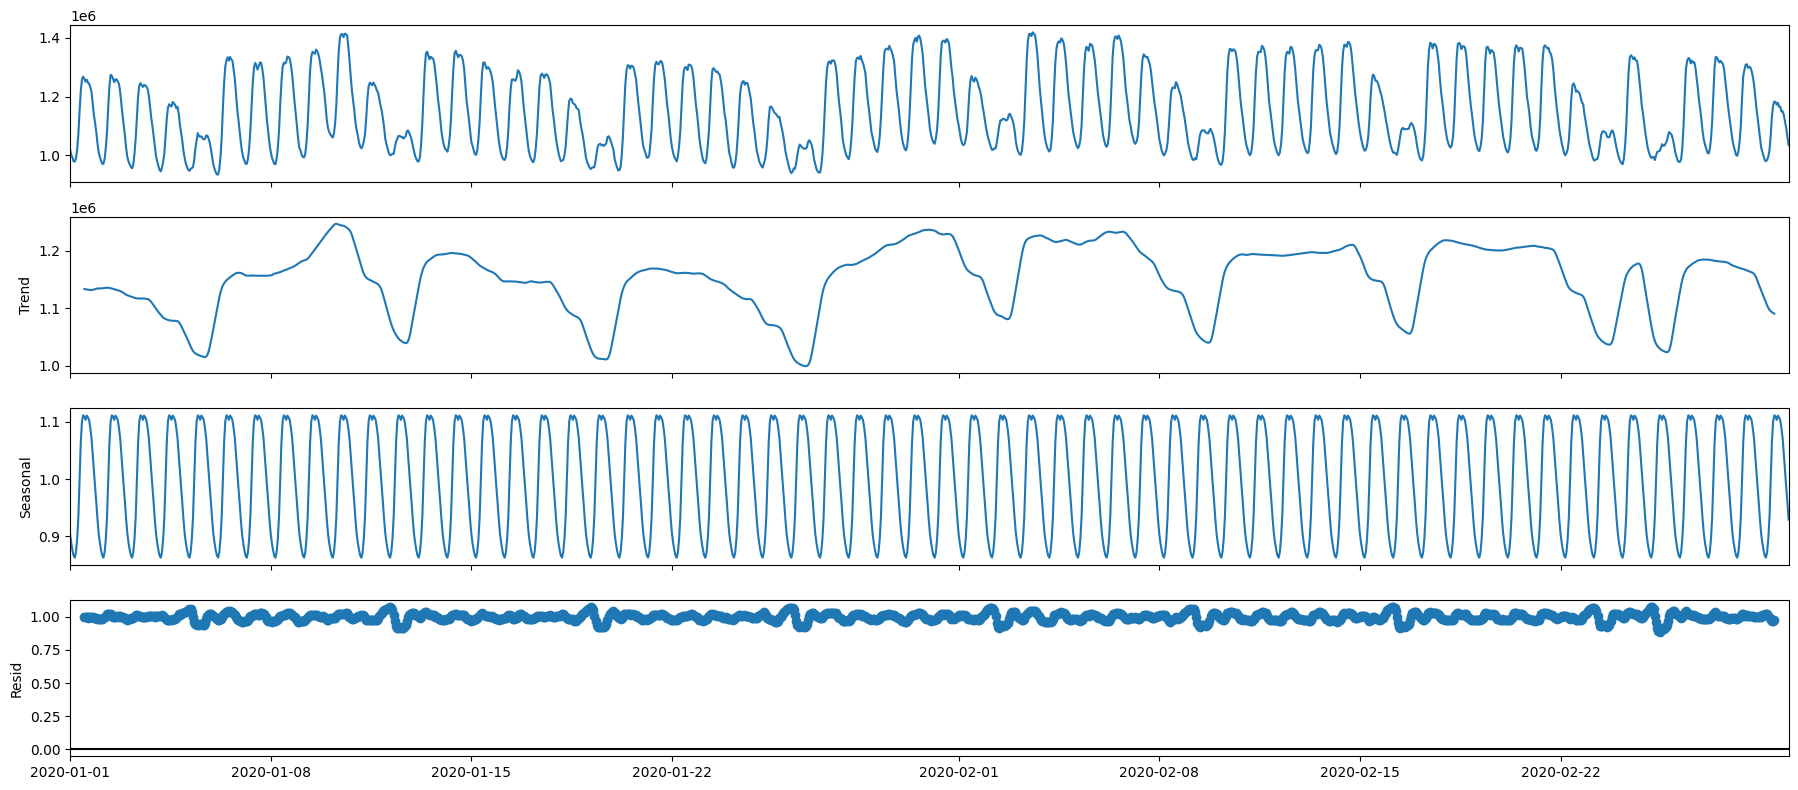

In [124]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y20, model='multiplicative')
fig = decomposition.plot()
plt.show()

Decomposing using logged values

In [125]:
y = actual_pre[['time', 'load_kw']]
y.load_kw = y["load_kw"].apply(math.log)
y = y.set_index('time')
y = y.reset_index()

/var/folders/0v/z1x4wq2x2tl7d63st822t7dh0000gn/T/ipykernel_37204/371195808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.load_kw = y["load_kw"].apply(math.log)


In [126]:
ylog17 = []
ylog18 = []
ylog19 = []
ylog20 = []

In [127]:

for i in range(len(y)):
    if y["time"][i].year == 2017:
        ylog17.append(y.iloc[i])
    if y["time"][i].year == 2018:
        ylog18.append(y.iloc[i])
    if y["time"][i].year == 2019:
        ylog19.append(y.iloc[i])
    if y["time"][i].year == 2020:
        ylog20.append(y.iloc[i])

In [128]:
ylog17 = pd.DataFrame(ylog17).set_index('time')
ylog18 = pd.DataFrame(ylog18).set_index('time')
ylog19 = pd.DataFrame(ylog19).set_index('time')
ylog20 = pd.DataFrame(ylog20).set_index('time')

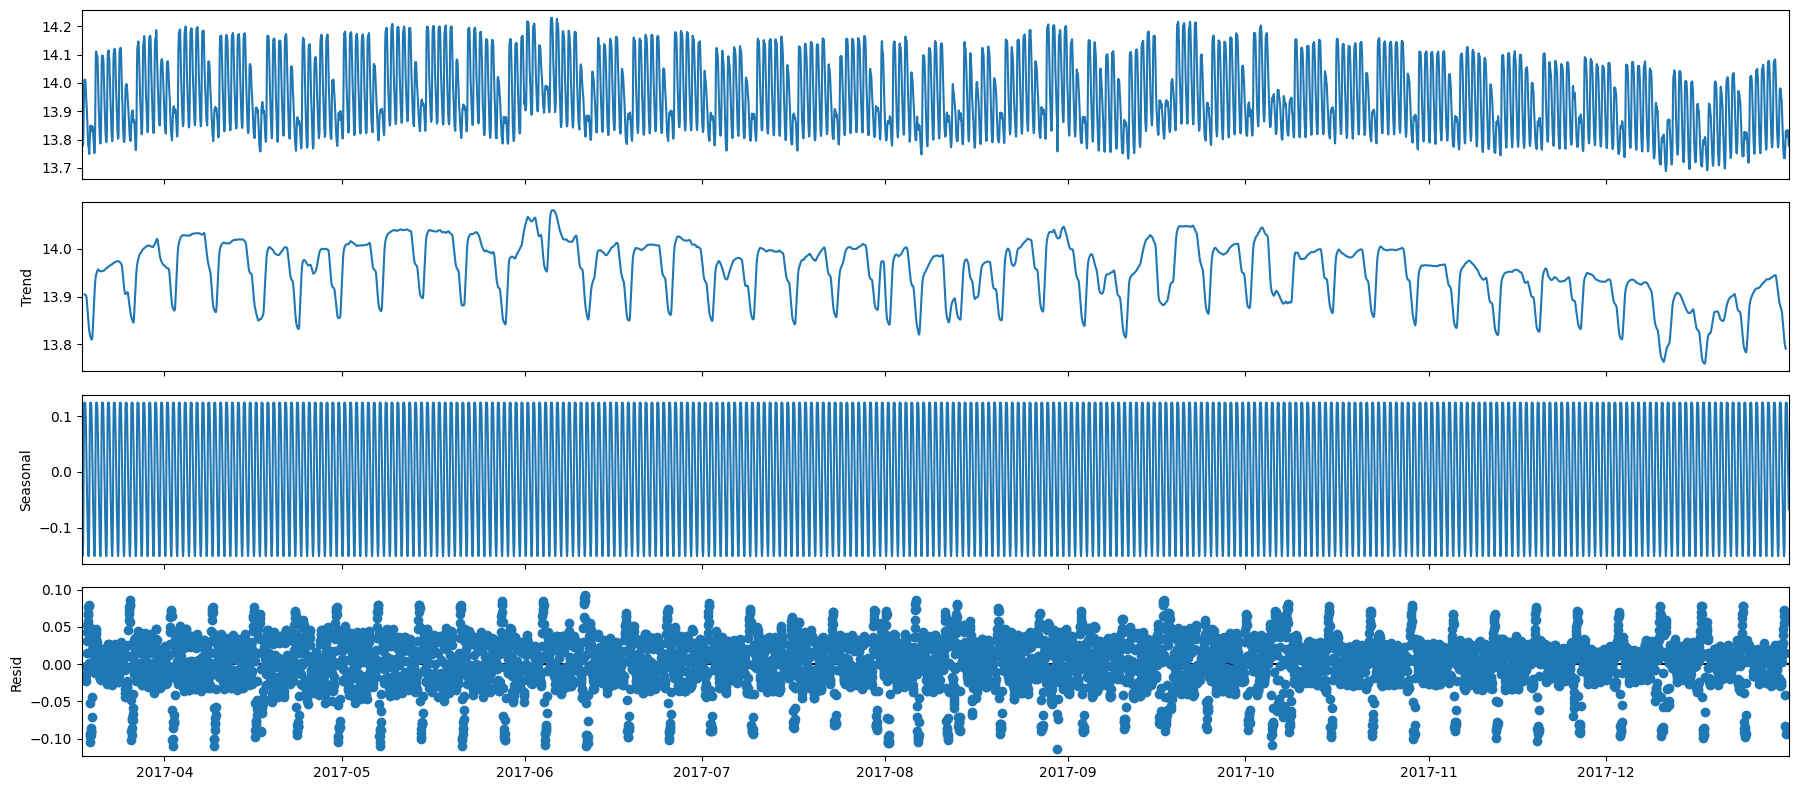

In [129]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ylog17, model='additive')
fig = decomposition.plot()
plt.show()

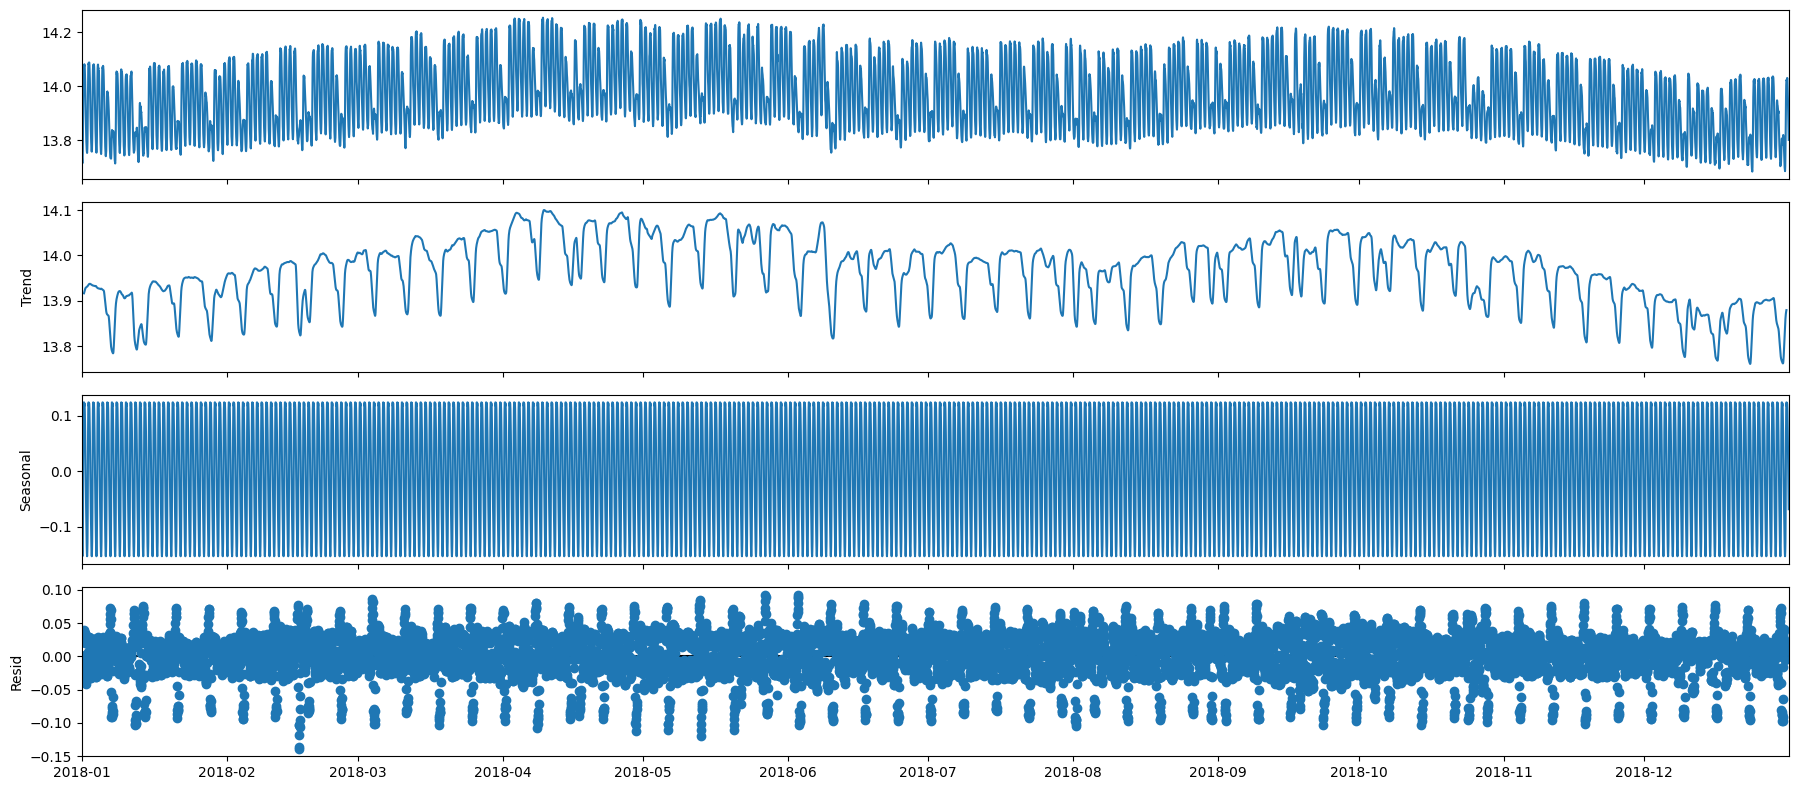

In [130]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ylog18, model='additive')
fig = decomposition.plot()
plt.show()

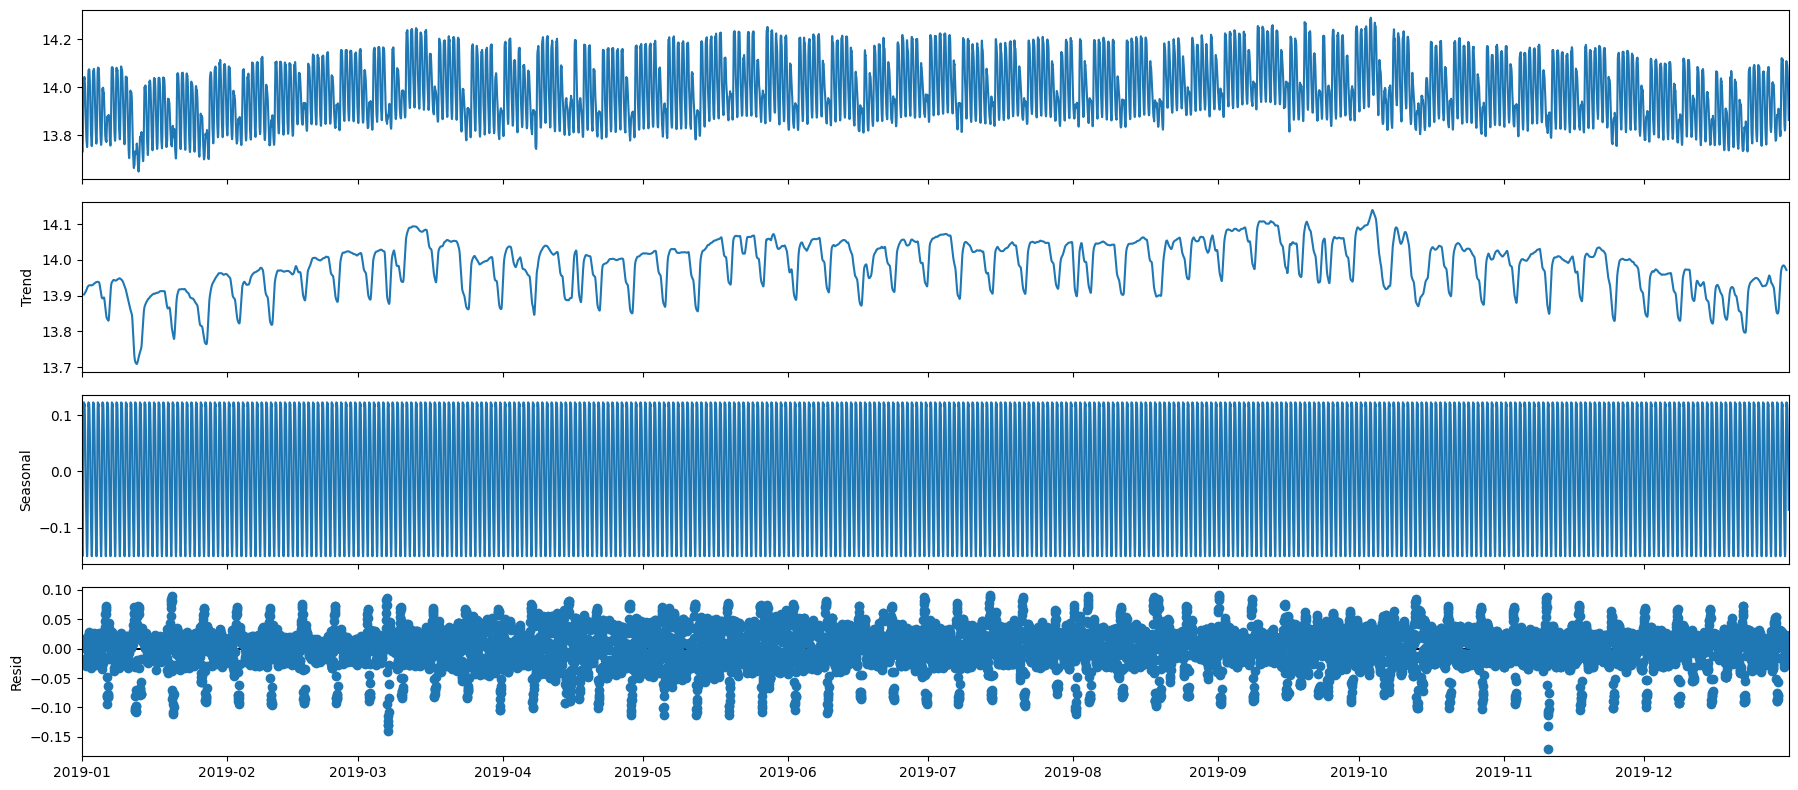

In [131]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ylog19, model='additive')
fig = decomposition.plot()
plt.show()

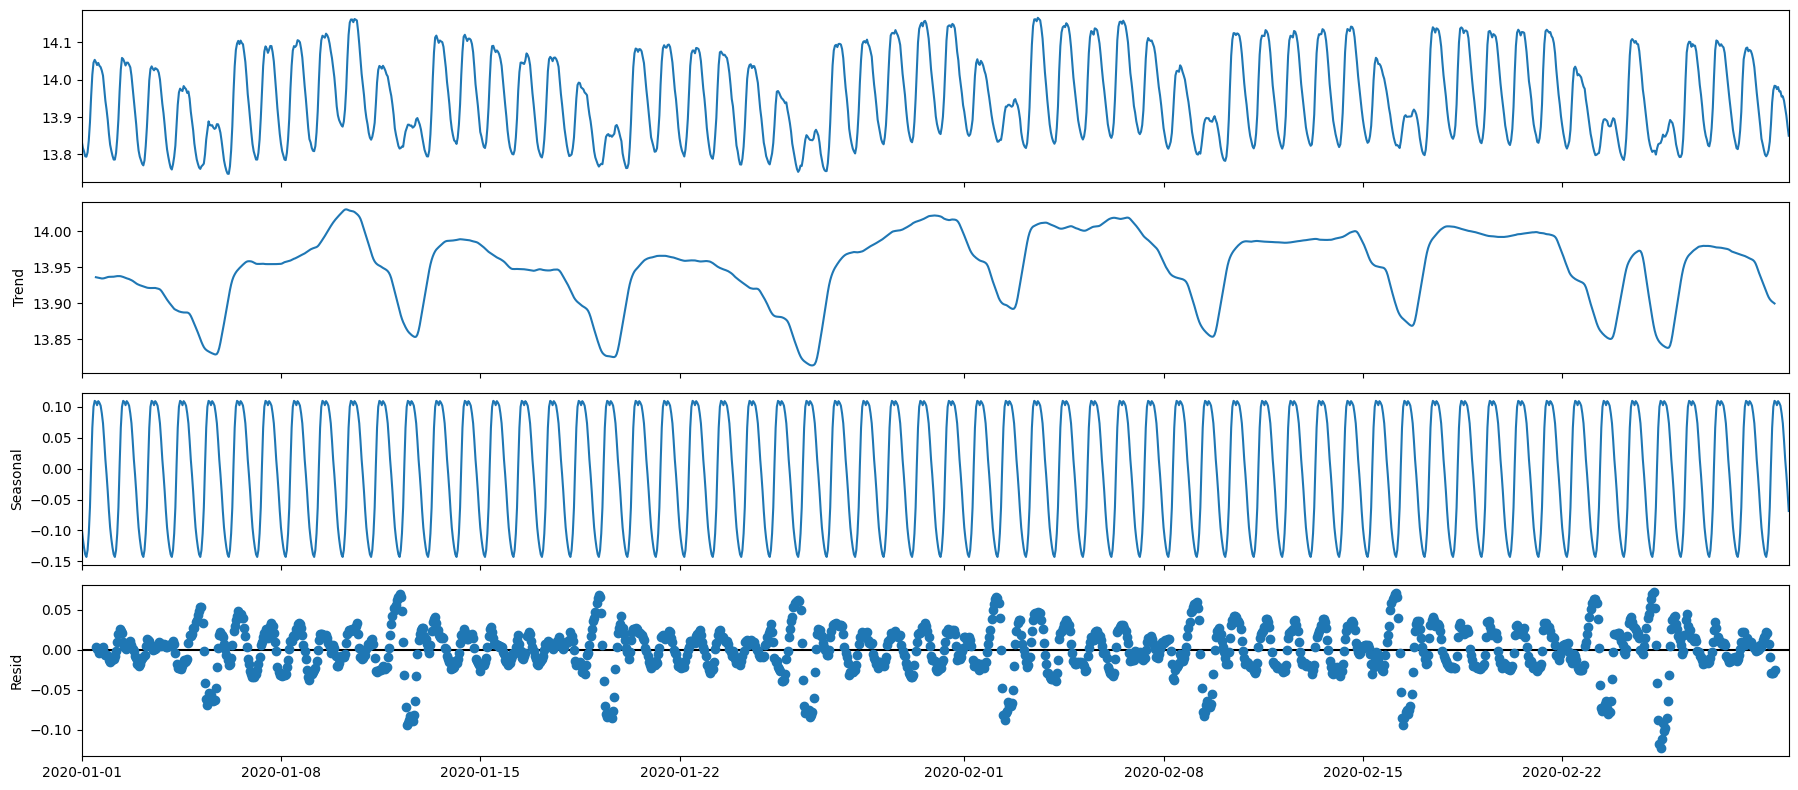

In [132]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ylog20, model='additive')
fig = decomposition.plot()
plt.show()

POST VALUES

In [133]:
y1 = actual_post[['time', 'load_kw']]
y1 = y1.set_index('time')
y1 = y1.reset_index()

In [134]:
y20 = []
y21 = []

In [135]:

for i in range(len(y1)):
    if y1["time"][i].year == 2020:
        y20.append(y1.iloc[i])
    if y1["time"][i].year == 2021:
        y21.append(y1.iloc[i])

In [136]:
y20 = pd.DataFrame(y20).set_index('time')
y21 = pd.DataFrame(y21).set_index('time')

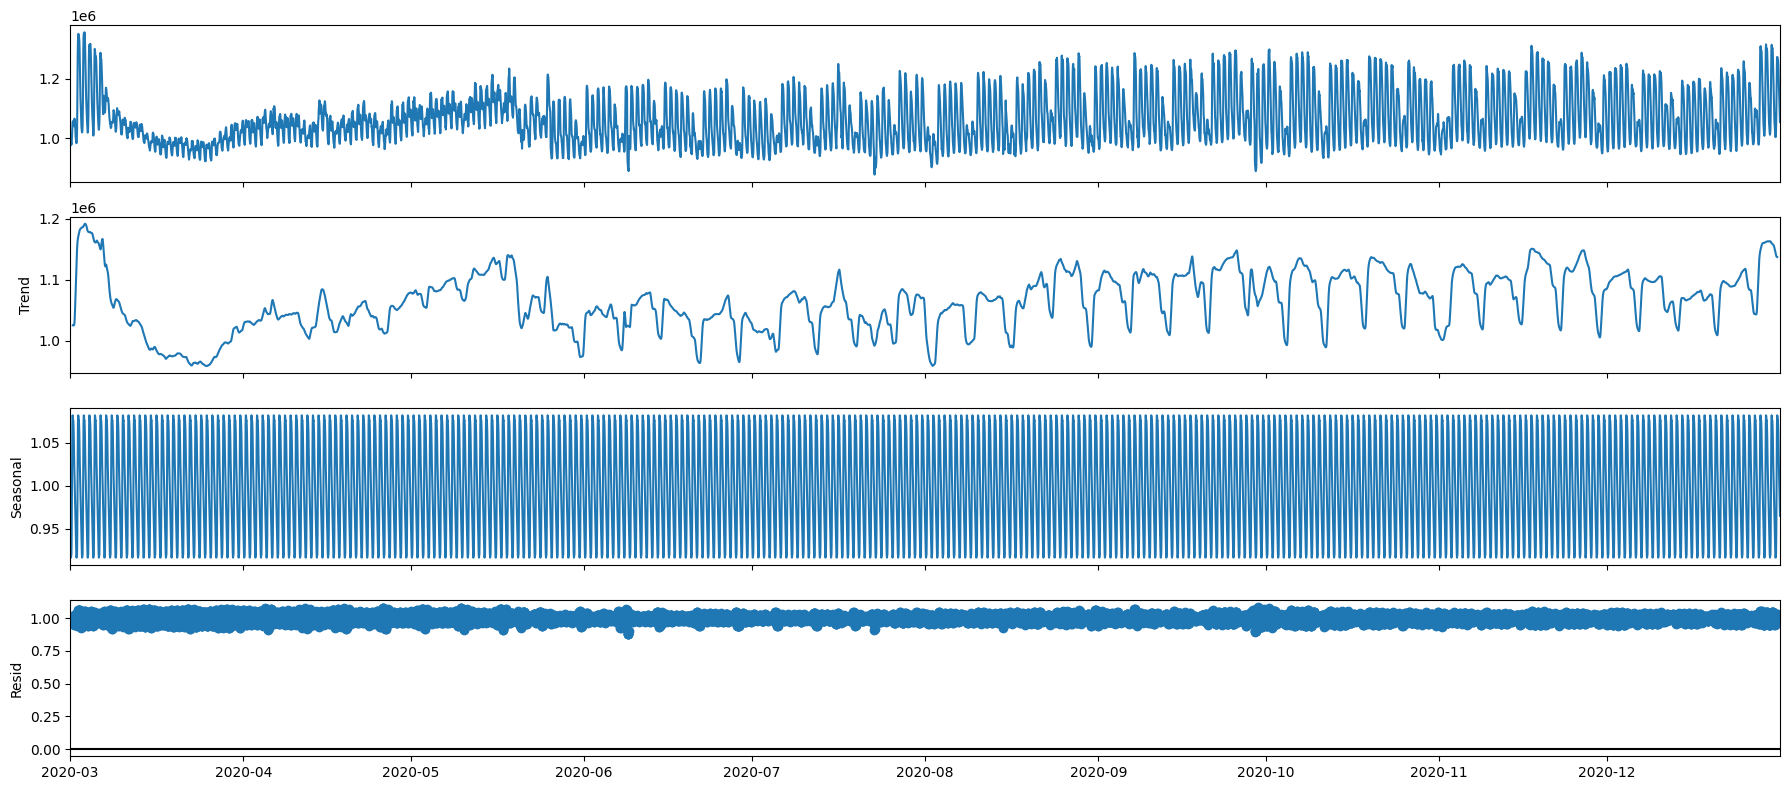

In [137]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y20, model='multiplicative')
fig = decomposition.plot()
plt.show()

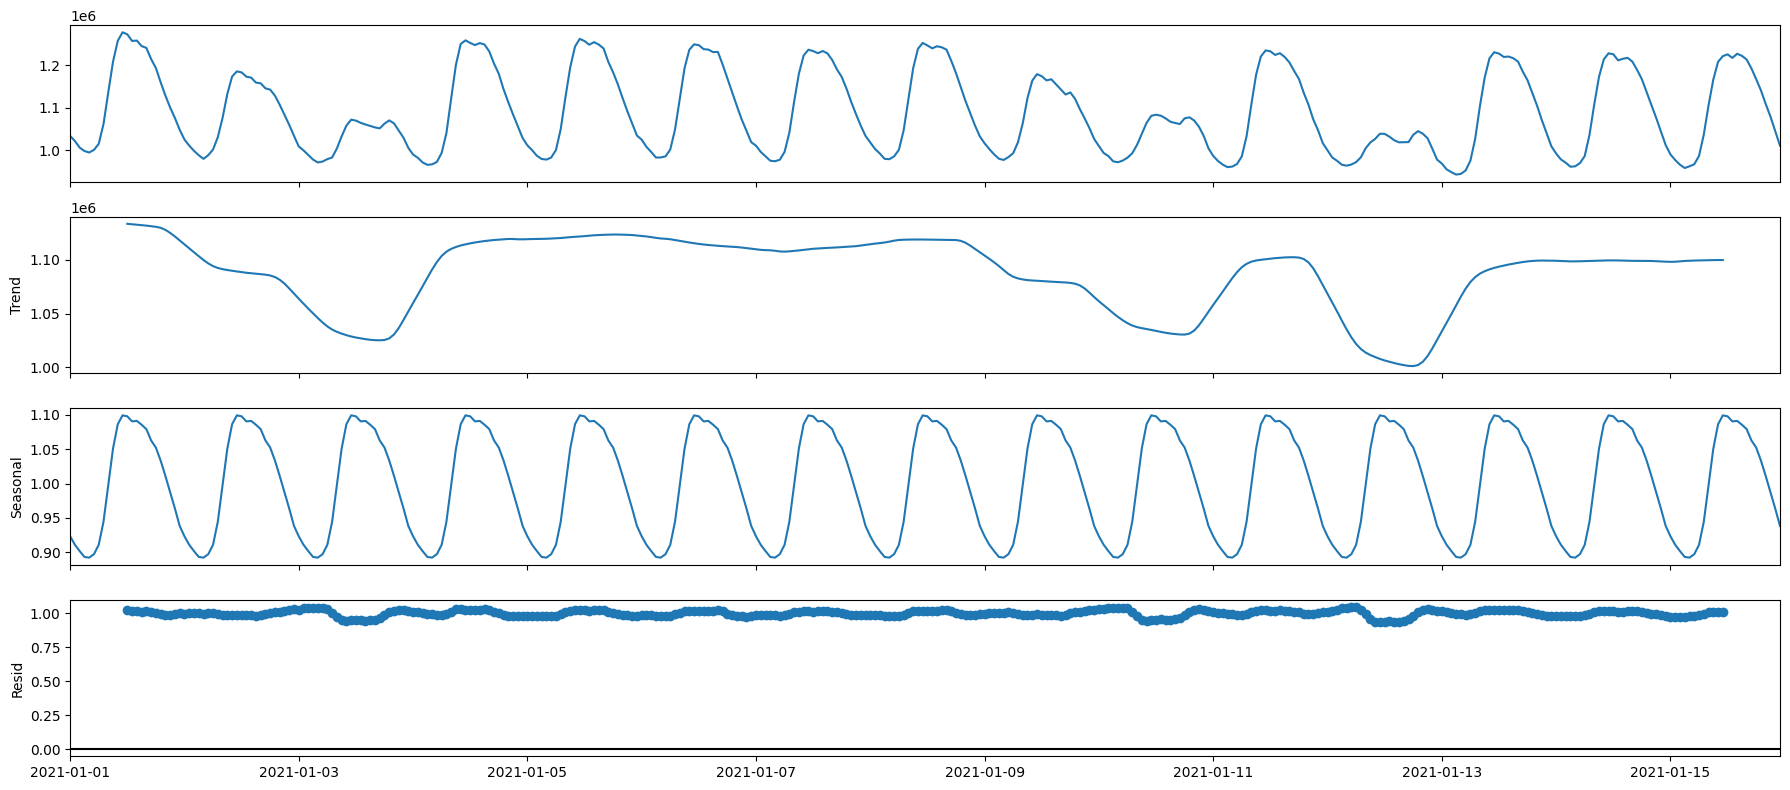

In [138]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y21, model='multiplicative')
fig = decomposition.plot()
plt.show()

Decomposing using logged values

In [139]:
y1 = actual_post[['time', 'load_kw']]
y1.load_kw = y1["load_kw"].apply(math.log)
y1 = y1.set_index('time').reset_index()

/var/folders/0v/z1x4wq2x2tl7d63st822t7dh0000gn/T/ipykernel_37204/1142816085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y1.load_kw = y1["load_kw"].apply(math.log)


In [140]:
ylog20 = []
ylog21 = []

In [141]:

for i in range(len(y1)):
    if y1["time"][i].year == 2020:
        ylog20.append(y1.iloc[i])
    if y1["time"][i].year == 2021:
        ylog21.append(y1.iloc[i])

In [142]:
ylog20 = pd.DataFrame(ylog20).set_index('time')
ylog21 = pd.DataFrame(ylog21).set_index('time')

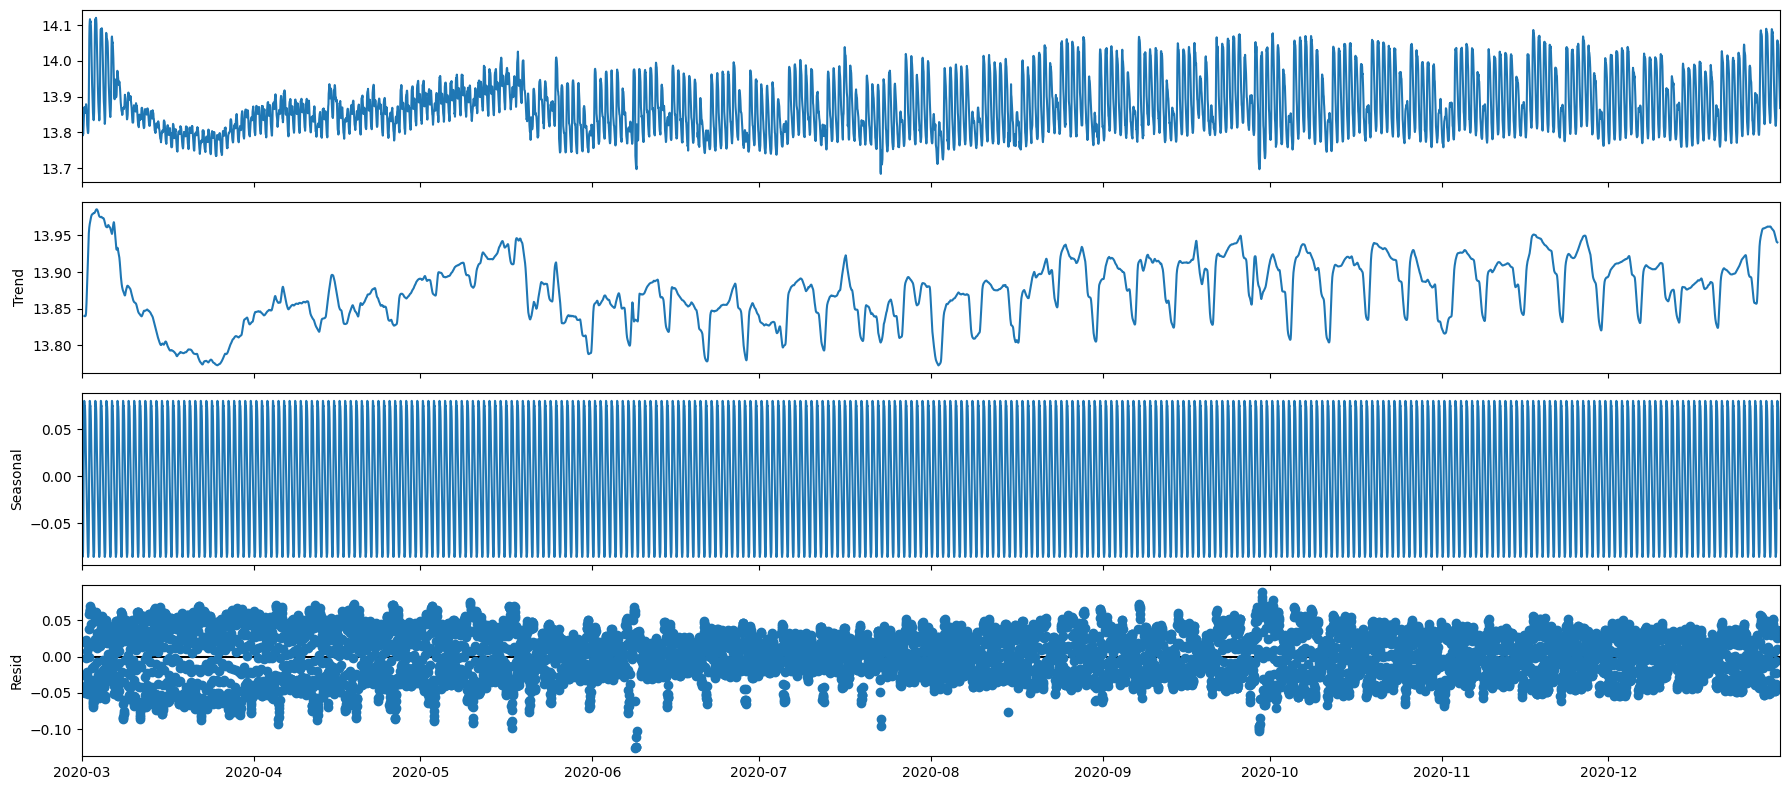

In [143]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ylog20, model='additive')
fig = decomposition.plot()
plt.show()

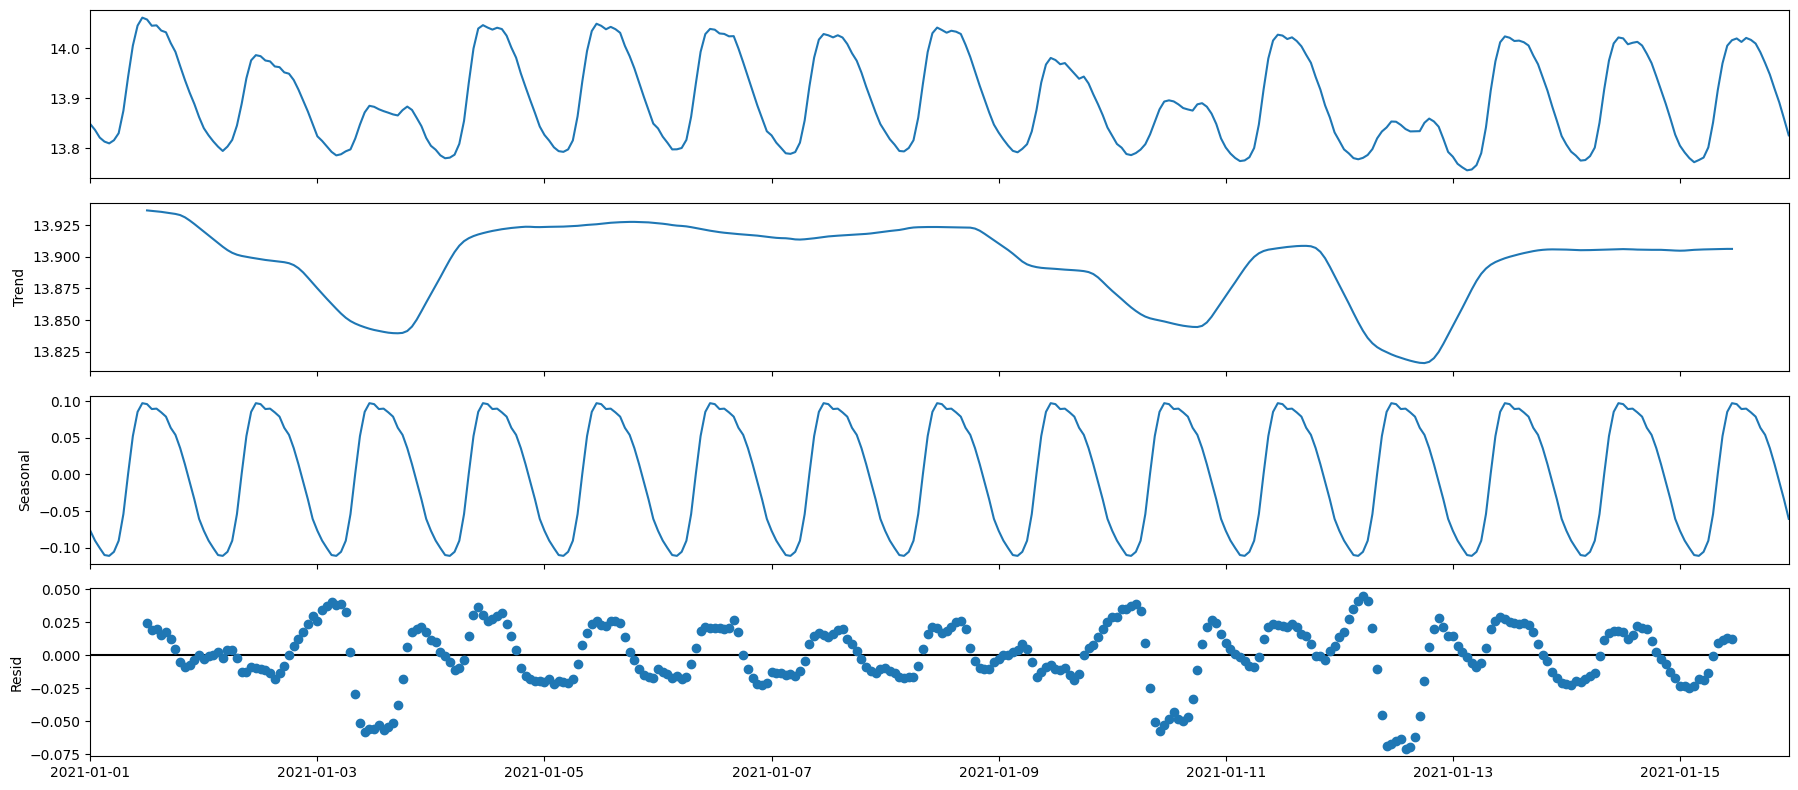

In [144]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ylog21, model='additive')
fig = decomposition.plot()
plt.show()

## Observing other variables vs load:

In [145]:
weather_attr = ['load_kw', 'pressure_kpa', 'cloud_cover', 'humidity',
       'temperature_c', 'wind_direction', 'wind_speed_kmh']

In [146]:
actuals_weather = actual_pre[weather_attr]
actuals_covid_weather = actual_post[weather_attr]

weather_corr = actuals_weather.corr()['load_kw']
weather_corr_covid = actuals_covid_weather.corr()['load_kw']

print("Pre COVID:\n",weather_corr[1:], "\n")
print("Post COVID:\n",weather_corr_covid[1:])

Pre COVID:
 pressure_kpa     -0.15892
cloud_cover       0.09324
humidity         -0.08734
temperature_c     0.61360
wind_direction    0.35525
wind_speed_kmh    0.51452
Name: load_kw, dtype: float64 

Post COVID:
 pressure_kpa      0.13879
cloud_cover      -0.09119
humidity         -0.42119
temperature_c     0.47652
wind_direction    0.24518
wind_speed_kmh    0.19283
Name: load_kw, dtype: float64


temperature, wind direction and wind speed had the highest correlation before and after covid. 
So they are the most consistent variables in terms of correlation. 

Except for humidity it has a stronger correlation post covid.

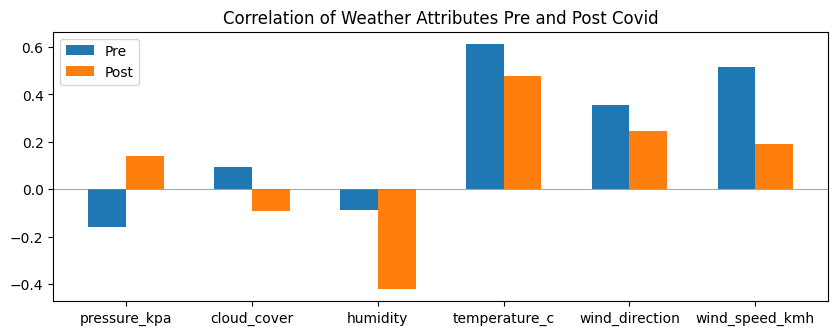

In [147]:
fig = plt.figure(figsize=(10, 3.5))

X_axis = np.arange(6)

plt.bar(X_axis-0.15, weather_corr[1:], label = "Pre", width = 0.3)
plt.bar(X_axis+0.15, weather_corr_covid[1:], label = "Post", width = 0.3)
plt.axhline(0, color='grey', linewidth="0.5")

plt.xticks(X_axis, weather_attr[1:])
plt.title("Correlation of Weather Attributes Pre and Post Covid")
plt.legend()

In [148]:
actual_pre[actual_pre['time'] >= datetime(2017, 1, 1 , 0, 0, 0)]

time       load_kw  pressure_kpa  cloud_cover  humidity  \
0     2017-03-18 00:00:00 1031471.62806    1012.48000      2.12500  79.33333   
1     2017-03-18 01:00:00 1007205.57844    1011.61875      0.00000  82.16667   
2     2017-03-18 02:00:00  986108.40072    1010.72000      2.12500  81.66667   
3     2017-03-18 03:00:00  970760.96692    1011.37625     17.12500  82.25000   
4     2017-03-18 04:00:00  962258.36502    1011.50000     18.62500  82.33333   
...                   ...           ...           ...          ...       ...   
25891 2020-02-29 19:00:00 1137285.04814    1009.90000      7.50000  64.33333   
25892 2020-02-29 20:00:00 1115285.04814    1010.50000     12.00000  68.33333   
25893 2020-02-29 21:00:00 1092285.04814    1010.90000      4.50000  69.91667   
25894 2020-02-29 22:00:00 1061785.04814    1011.35000      0.00000  68.75000   
25895 2020-02-29 23:00:00 1035285.04814    1011.60000     17.25000  68.58333   

       temperature_c  wind_direction  wind_speed_kmh        date  datetime  \
0           16.76439       285.25000         6.25375  2017-03-18  00:00:00   
1           15.72939       285.00000         9.20500  2017-03-18  01:00:00   
2           15.81689       316.00000        11.28375  2017-03-18  02:00:00   
3           15.91939       327.00000         7.16875  2017-03-18  03:00:00   
4           15.76939       282.25000         0.78000  2017-03-18  04:00:00   
...              ...             ...             ...         ...       ...   
25891       15.71189       335.25000        15.21625  2020-02-29  19:00:00   
25892       13.37189       344.75000        13.60625  2020-02-29  20:00:00   
25893       12.04439       224.37500        10.96375  2020-02-29  21:00:00   
25894       11.41189        19.75000         7.64625  2020-02-29  22:00:00   
25895       10.00939        64.75000         2.37000  2020-02-29  23:00:00   

       month  hour  type_of_day  
0          3     0            6  
1          3     1            6  
2          3     2            6  
3          3     3            6  
4          3     4            6  
...      ...   ...          ...  
25891      2    19            6  
25892      2    20            6  
25893      2    21            6  
25894      2    22            6  
25895      2    23            6  

[25896 rows x 13 columns]

Text(0.5, 0, 'Load')

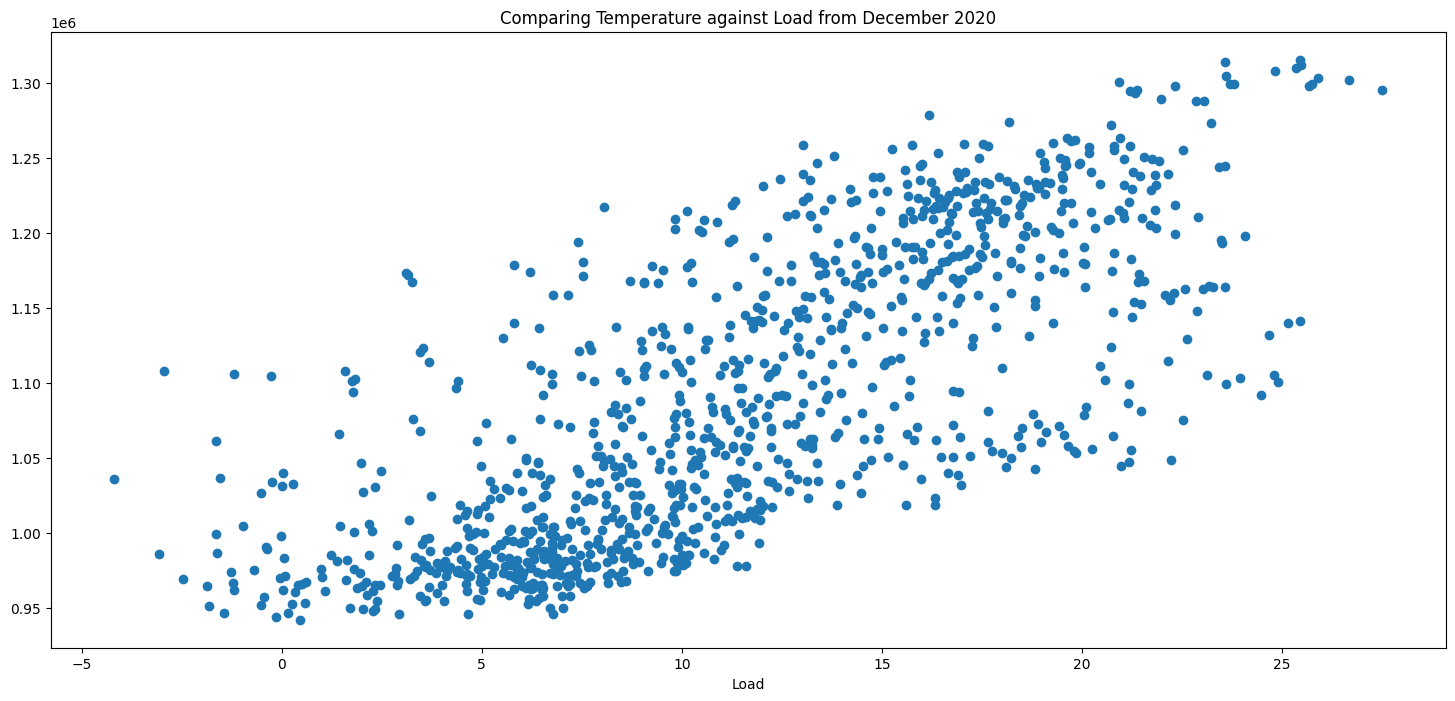

In [149]:
plt.scatter(actual_post[actual_post['time'] >= datetime(2020, 12, 1 , 0, 0, 0)]['temperature_c'], actual_post[actual_post['time'] >= datetime(2020, 12, 1 , 0, 0, 0)]['load_kw'])
plt.title("Comparing Temperature against Load from December 2020")
plt.xlabel('temperature')
plt.xlabel('Load')

### Testing the accuracy of the forecasted weather data

In [150]:
# uncomment to install scikit-learn and comment again when done
# !pip install scikit-learn

In [151]:
from sklearn.metrics import mean_absolute_error as mae

MAE of weather variables pre COVID

In [152]:
ac_precovid = actual_pre
fc_precovid = forecast_pre

print("MAE of Pressure:", 
        round(mae(ac_precovid["pressure_kpa"], 
        fc_precovid["pressure_kpa"]),3), 
        "%")

print("MAE of Cloud Cover:", 
        round(mae(ac_precovid["cloud_cover"], 
        fc_precovid["cloud_cover"]),3), 
        "%")

print("MAE of Temperature:", 
        round(mae(ac_precovid["temperature_c"], 
        fc_precovid["temperature_c"]),3), 
        "%")

print("MAE of Wind Direction:", 
        round(mae(ac_precovid["wind_direction"], 
        fc_precovid["wind_direction"]),3), 
        "%")
        
print("MAE of Wind Speed:", 
        round(mae(ac_precovid["wind_speed_kmh"], 
        fc_precovid["wind_speed_kmh"]),3), 
        "%")

MAE of Pressure: 1.053 %
MAE of Cloud Cover: 18.231 %
MAE of Temperature: 2.895 %
MAE of Wind Direction: 48.124 %
MAE of Wind Speed: 4.568 %


MAE of weather variables post COVID

In [153]:
ac_postcovid = actual_post
fc_postcovid = forecast_post

print("MAE of Pressure:", 
        round(mae(ac_postcovid["pressure_kpa"], 
        fc_postcovid["pressure_kpa"]),3), 
        "%")

print("MAE of Cloud Cover:", 
        round(mae(ac_postcovid["cloud_cover"], 
        fc_postcovid["cloud_cover"]),3), 
        "%")

print("MAE of Temperature:", 
        round(mae(ac_precovid["temperature_c"], 
        fc_precovid["temperature_c"]),3), 
        "%")

print("MAE of Wind Direction:", 
        round(mae(ac_precovid["wind_direction"], 
        fc_precovid["wind_direction"]),3), 
        "%")
        
print("MAE of Wind Speed:", 
        round(mae(ac_precovid["wind_speed_kmh"], 
        fc_precovid["wind_speed_kmh"]),3), 
        "%")

MAE of Pressure: 0.512 %
MAE of Cloud Cover: 17.913 %
MAE of Temperature: 2.895 %
MAE of Wind Direction: 48.124 %
MAE of Wind Speed: 4.568 %
